PROBLEM 1

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco
from matplotlib.ticker import FuncFormatter


problem - 1A

In [148]:
original_df = pd.read_csv('Human_Development_Index_Dataset.csv', encoding='latin-1')

1- EXTRACT LATEST YEAR:


To Identify unique years in dataset

In [149]:

original_df['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

To Filter the dataset to include only observations from the year 2022.


In [150]:
hdi_2022_df = original_df[original_df['year'] == 2022].copy()

To save the filtered dataframe as hdi_2022_df


In [151]:
hdi_2022_df.to_csv('hdi_2022_data.csv', index=False)

2-DATA EXPLORATION


Display the first 10 rows of the 2022 dataset

In [152]:
hdi_2022_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


To Count the number of Rows and Columns


In [153]:
print("No. of Rows:", hdi_2022_df.shape[0], "No. of Columns:", hdi_2022_df.shape[1])

No. of Rows: 206 No. of Columns: 30


In [154]:
print("Column Names: \n", hdi_2022_df.columns)
print("\n")
print("\nData Types: \n", hdi_2022_df.dtypes)

Column Names: 
 Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')



Data Types: 
 Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m

In [155]:
print("Samples of non-numeric data in GNI:", hdi_2022_df['gross_inc_percap'].unique())

Samples of non-numeric data in GNI: [  1335.205733   15293.32651    10978.40571    54233.44948
   5327.788251   18783.96536    22047.97131    15388.29976
  49257.1352     56529.66329    15018.05443    32534.88784
  48731.44564     6511.122178   14810.23783    18425.01061
  53644.03854     9242.082259    3406.072937   10624.87388
   7987.842247   16571.41275    14841.57836    14615.89235
  59245.63485    25920.80375     2036.997179     712.0260007
   7601.085433    4291.113168    3681.469988   48444.39319
    869.11237     1388.897502   24430.99593    18024.88747
  15013.92724     3260.555466    2902.808037    1080.138308
  20248.38031     5376.396062   34323.80663     7953.448426
  40136.89453    39944.66682    62018.95694     4874.51828
  12467.85548    18653.26836    10693.23484    12360.8163
   8886.173528   10662.65921     1957.046464   37151.63384
   8391.855111    2368.758391   11233.65882    49522.09853
  47378.74304    11194.21884     2089.626826   15952.02452
  55340.19722    

3- MISSING VALUES & DATA CLEANING

To Check for missing values in each column and report total counts

In [156]:
hdi_2022_df.isnull().sum()

Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

Inspect dataset for:
<br>
– numeric columns stored as text,
<br>
– inconsistent or misspelled country names,
<br>
– duplicate rows,
<br>
– special characters (e.g., “–”) representing missing data.
<br>
• Apply necessary cleaning steps:
<br>
– convert data types where needed,
<br>
– remove duplicates,
<br>
– handle missing values (drop or impute; justify your choice).

In [157]:
# Check nully counts
hdi_2022_df.isnull().sum()

Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41
dtype: int64

In [158]:
print("--- Inspecting 'gross_inc_percap' for non-numeric values ---")
non_numeric_values = hdi_2022_df[pd.to_numeric(hdi_2022_df['gross_inc_percap'], errors='coerce').isna()]['gross_inc_percap'].unique()
print(non_numeric_values)

--- Inspecting 'gross_inc_percap' for non-numeric values ---
[nan]


In [159]:
# 2 Indentfy Numeric Columns

# identifier columns
id_cols = ['country','iso3','year']

# target column
numeric_cols_to_clean = [col for col in hdi_2022_df.columns if col not in id_cols]

print("Numeric Columns to Clean: \n", numeric_cols_to_clean)

Numeric Columns to Clean: 
 ['Unnamed: 0', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']


In [160]:
# 3 Inspect and clean data
for col in numeric_cols_to_clean:
    # Convert column to numeric, forcing errors (text/special chars) to NaN
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')

In [161]:
# Clean country names using country_converter
hdi_2022_df['country'] = coco.convert(names=hdi_2022_df['country'], to='name_short')

# FILTER REGIONS:
# Rows where 'iso3' starts with 'ZZ' represent aggregated regions (e.g., "Arab States", "World").
# We remove these to ensure our analysis is strictly at the "Country" level.
hdi_2022_df = hdi_2022_df[~hdi_2022_df['iso3'].str.startswith('ZZ')]


Very high human development not found in regex
High human development not found in regex
Medium human development not found in regex
Low human development not found in regex
Arab States not found in regex
East Asia and the Pacific not found in regex
Europe and Central Asia not found in regex
Latin America and the Caribbean not found in regex
South Asia not found in regex
Sub-Saharan Africa not found in regex
World not found in regex


In [162]:
# 5. Remove dupilcate rows
starting_row_count = hdi_2022_df.shape[0]
hdi_2022_df.drop_duplicates(inplace=True)
rows_removed = starting_row_count - hdi_2022_df.shape[0]
print(f"Removed {rows_removed} duplicate rows.")

Removed 0 duplicate rows.


In [163]:
# Handle missing values
# 1. Drop rows where HDI (target variable) is missing
print("For Problem 1A, rows missing HDI were dropped because HDI is the primary dependent metric. Other missing values were retained unless required for a specific task (e.g., GNI per capita for sorting), because imputing could bias comparisons")
print("\n")      
missing_before = hdi_2022_df['hdi'].isnull().sum()
hdi_2022_df.dropna(subset=['hdi'], inplace=True)

# 2. Drop rows where GNI is missing (Required for Task 5 sorting)
# Some countries might have HDI but no GNI data. We must drop them to allow for sorting later.
missing_gni_before = hdi_2022_df['gross_inc_percap'].isnull().sum()
hdi_2022_df.dropna(subset=['gross_inc_percap'], inplace=True)

print(f"Dropped {missing_before} rows with missing HDI values.")
print(f"Dropped {missing_gni_before} rows with missing GNI per Capita values.")
print(f"Final shape: {hdi_2022_df.shape}")


For Problem 1A, rows missing HDI were dropped because HDI is the primary dependent metric. Other missing values were retained unless required for a specific task (e.g., GNI per capita for sorting), because imputing could bias comparisons


Dropped 2 rows with missing HDI values.
Dropped 0 rows with missing GNI per Capita values.
Final shape: (193, 30)


***


4. BASIC STATISTICS

In [164]:
# 1. Compute mean median and standard deviation for hdi

hdi_computation = hdi_2022_df['hdi'].agg(['mean', 'median', 'std'])
print("HDI Computations:\n", hdi_computation)

HDI Computations:
 mean      0.723741
median    0.740000
std       0.155177
Name: hdi, dtype: float64


In [165]:
# 2. Country with highest HDI
highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
print("Country with Highest HDI:\n", highest_hdi_country[['country', 'hdi']])

# 3. Country with lowest HDI
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
print("Country with Lowest HDI:\n", lowest_hdi_country[['country', 'hdi']])

Country with Highest HDI:
 country    Switzerland
hdi              0.967
Name: 5609, dtype: object
Country with Lowest HDI:
 country    Somalia
hdi           0.38
Name: 5345, dtype: object


***


5. FILTERING AND SORTING

In [166]:
# Inspection Step: Check for non-numeric characters in numeric columns
# Example: Check the unique values in a column known to have issues to show the "–" or text.
# Or simply print dtypes again to point out that 'gross_inc_percap' is an 'object' before cleaning.

In [167]:
# 1. Filter countries with HDI above 0.8
above_0_8_countries = hdi_2022_df[hdi_2022_df['hdi'] > 0.8]
print("Countries with HDI above 0.8:\n", above_0_8_countries[['country', 'hdi']])

Countries with HDI above 0.8:
                    country    hdi
131                Andorra  0.884
197    Antigua and Barbuda  0.826
230              Argentina  0.849
296              Australia  0.946
329                Austria  0.926
...                    ...    ...
5939               Türkiye  0.855
6104  United Arab Emirates  0.937
6137        United Kingdom  0.940
6170         United States  0.927
6203               Uruguay  0.830

[69 rows x 2 columns]


In [168]:
# 2. Descending order sort GNI
sorted_by_gni = above_0_8_countries.sort_values(by='gross_inc_percap', ascending=False)

In [169]:
#3 Display the top 10
print("Top 10 Countries by GNI per Capita:\n", sorted_by_gni[['country', 'gross_inc_percap']].head(10))

Top 10 Countries by GNI per Capita:
                    country  gross_inc_percap
3332         Liechtenstein      146673.24150
4718                 Qatar       95944.37754
5213             Singapore       88761.14559
2705               Ireland       87467.51391
3398            Luxembourg       78554.23640
6104  United Arab Emirates       74103.71494
5609           Switzerland       69432.78669
4322                Norway       69189.76165
6170         United States       65564.93798
2474             Hong Kong       62485.50516


***

6. Adding HDI Category Column:

In [170]:
# Creating HDI_category column
# low < 0.550
# medium 0.550 - 0.699
# high 0.700 - 0.799
# very >= 0.800

def categorize_hdi(hdi_value):
    if hdi_value < 0.550:
        return 'low'
    elif 0.550 <= hdi_value < 0.700:
        return 'medium'
    elif 0.700 <= hdi_value < 0.800:
        return 'high'
    else:
        return 'very high'

hdi_2022_df['hdi_category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

# verify all countries have been categorized
print(hdi_2022_df[['country', 'hdi', 'hdi_category']].head(10))

# Export HDI_category_added.csv
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)




                 country    hdi hdi_category
32           Afghanistan  0.462          low
65               Albania  0.789         high
98               Algeria  0.745         high
131              Andorra  0.884    very high
164               Angola  0.591       medium
197  Antigua and Barbuda  0.826    very high
230            Argentina  0.849    very high
263              Armenia  0.786         high
296            Australia  0.946    very high
329              Austria  0.926    very high


****

***

PROBLEM - 1B

1. Data Extraction and Saving

In [171]:
# 1 filter dataset to include only the years 2020, 2021, and 2022

HDI_problem_1B_df = original_df[original_df['year'].isin([2020, 2021, 2022])].copy()

In [172]:
# 2 Save to new CSV file
HDI_problem_1B_df.to_csv('HDI_problem1B.csv', index=False)

2. Data Cleaning

In [173]:
# 2.1 Checking for missing values in hdi, country, year
missing_values_problem1B = HDI_problem_1B_df[['country', 'year', 'hdi']].isnull().sum()
print("Missing Values in HDI_problem1B.csv:\n", missing_values_problem1B)

Missing Values in HDI_problem1B.csv:
 country    0
year       0
hdi        8
dtype: int64


In [174]:
# 2.2.1 Handle missing values
missing_before_problem1B = HDI_problem_1B_df['hdi'].isnull().sum()
print(f"Missing HDI values before cleaning: {missing_before_problem1B}")

#2.2.1 Address missing values
# resoning: Since HDI is the target variable, we will drop rows where HDI is missing
HDI_problem_1B_df.dropna(subset=['hdi'], inplace=True)


Missing HDI values before cleaning: 8


In [175]:

# FIRST remove aggregates, based on iso
HDI_problem_1B_df = HDI_problem_1B_df[~HDI_problem_1B_df['iso3'].str.startswith('ZZ')]

# THEN standardize country names
HDI_problem_1B_df['country'] = coco.convert(names=HDI_problem_1B_df['country'], to='name_short')



In [176]:
# 2.2.3 Duplicate Rows
starting_row_count_problem1B = HDI_problem_1B_df.shape[0]
HDI_problem_1B_df.drop_duplicates(inplace=True)
rows_removed_problem1B = starting_row_count_problem1B - HDI_problem_1B_df.shape[0]

print(f"Removed {rows_removed_problem1B} duplicate rows from HDI_problem1B.csv.")

Removed 0 duplicate rows from HDI_problem1B.csv.


In [177]:
# Numeric columns stored as text and containing non-numeric characters
# 2.2.4 Identfy Numeric Columns

# identifier columns
id_cols = ['country','iso3','year']

# target column

numeric_cols_to_clean = [col for col in HDI_problem_1B_df.columns if col not in id_cols]

for col in numeric_cols_to_clean:
    HDI_problem_1B_df[col] = pd.to_numeric(HDI_problem_1B_df[col], errors='coerce')

print("Numeric Columns to Clean: \n", numeric_cols_to_clean)


Numeric Columns to Clean: 
 ['Unnamed: 0', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons']


In [178]:
# 2.2.4 Adressing numeric columns stored as text and containing non-numeric characters
for col in numeric_cols_to_clean:
    # Convert column to numeric, forcing errors (text/special chars) to NaN
    HDI_problem_1B_df[col] = pd.to_numeric(HDI_problem_1B_df[col], errors='coerce')

In [179]:
# 2.3.1 Handle missing values
missing_before_problem1B = HDI_problem_1B_df['hdi'].isnull().sum()
# HDI_problem_1B_df.dropna(subset=['hdi'], inplace=True)
print(f"dropped {missing_before_problem1B} rows with missing HDI values from HDI_problem1B.csv.")

dropped 0 rows with missing HDI values from HDI_problem1B.csv.


In [180]:
# 2.3.4 Enusring consistent naming conventions for years and countries
HDI_problem_1B_df['year'] = HDI_problem_1B_df['year'].astype(int)
HDI_problem_1B_df['country'] = HDI_problem_1B_df['country'].str.title()

3. Visualization Tasks

A. Line chart - Hdi Trend

From the line chart, 
 the data shows that China has the highest HDI among the selected Asian countries from 2020 to 2022, followed by Japan and South Korea. India and Indonesia have lower HDI values in comparison. Overall, there is a slight upward trend in HDI for all countries over the three years, indicating gradual improvements in human development indicators.


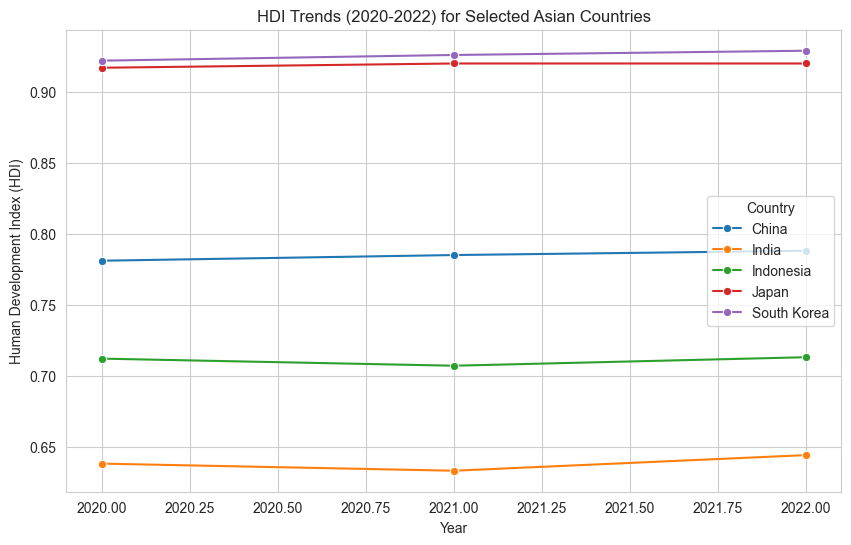

In [181]:
# 3A-1. Line Chart — HDI Trend (Country-Level)

# five countries array of asian region

asian_countries = ['India', 'China', 'Japan', 'South Korea', 'Indonesia']
# Plot Line chart, HDI values for these countries
asian_hdi_df = HDI_problem_1B_df[HDI_problem_1B_df['country'].isin(asian_countries)]

# plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=asian_hdi_df, x='year', y='hdi', hue='country', marker='o')
plt.title('HDI Trends (2020-2022) for Selected Asian Countries')
plt.xlabel('Year')
plt.ylabel('Human Development Index (HDI)')
plt.legend(title='Country')

print("From the line chart, \n the data shows that China has the highest HDI among the selected Asian countries from 2020 to 2022, followed by Japan and South Korea. India and Indonesia have lower HDI values in comparison. Overall, there is a slight upward trend in HDI for all countries over the three years, indicating gradual improvements in human development indicators.")




B- Generate visualitons

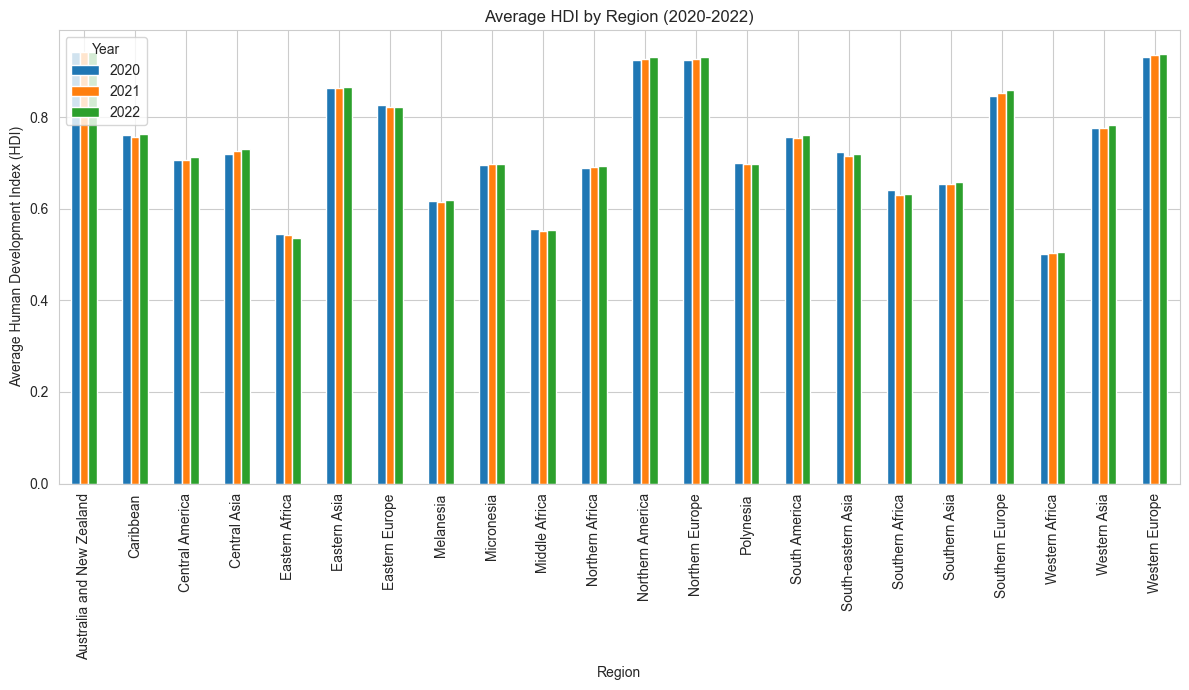

From the bar chart, 
 we can observe that regions such as Europe and North America consistently have higher average HDI values compared to regions like Africa and South Asia. Over the three years from 2020 to 2022, most regions show a slight increase in average HDI, indicating overall improvements in human development.


In [182]:
# B. Generate visualisations

# * – Bar Chart: Average HDI by Region (2020–2022)


# * Group the dataset by Region and year
# change the continent to region in df


HDI_problem_1B_df['region'] = coco.convert(names=HDI_problem_1B_df['country'], to='UNregion', not_found=None)
grouped_by_region_df = HDI_problem_1B_df.groupby(['region', 'year']).agg({'hdi': 'mean'}).reset_index()

# * Compute the mean HDI for each region-year pair
average_hdi_by_region = grouped_by_region_df.pivot(index='region', columns='year', values='hdi')

# ∗ Plot a bar chart comparing average HDI across regions for each year.
# ∗ Label axes clearly and include a descriptive title

average_hdi_by_region.plot(kind='bar', figsize=(12, 7))
plt.title('Average HDI by Region (2020-2022)')
plt.xlabel('Region')
plt.ylabel('Average Human Development Index (HDI)')
plt.legend(title='Year')
plt.tight_layout()
plt.show()
print("From the bar chart, \n we can observe that regions such as Europe and North America consistently have higher average HDI values compared to regions like Africa and South Asia. Over the three years from 2020 to 2022, most regions show a slight increase in average HDI, indicating overall improvements in human development.")

– Box Plot: HDI Distribution for 2020, 2021, and 2022

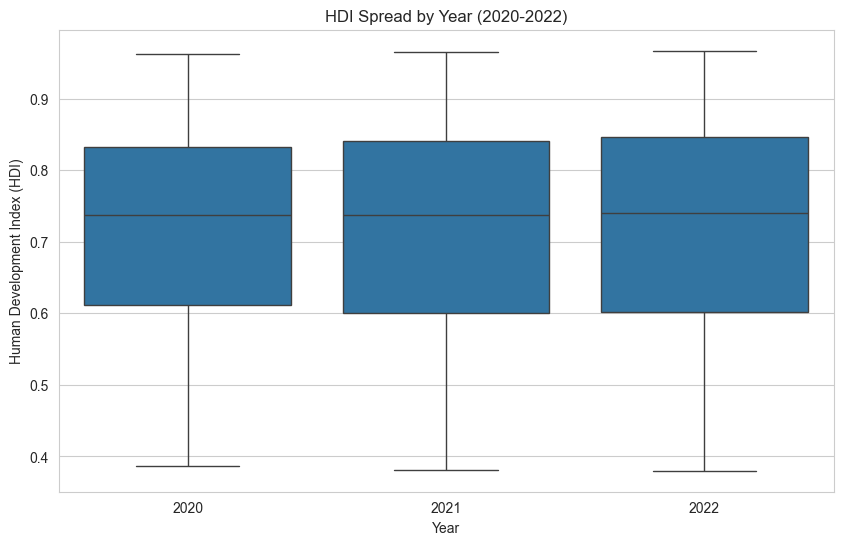

From the box plot, 
 we can see that the median HDI values for each year (2020, 2021, and 2022) are relatively stable, indicating consistent human development levels across these years. The interquartile range (IQR) is also similar, suggesting that the spread of HDI values does not vary significantly year to year. However, there are some outliers present in each year, indicating that a few countries have significantly higher or lower HDI values compared to the majority.


In [183]:
# ∗ Filter the dataset for the years 2020, 2021, and 2022.
# alreayd filtered above
HDI_problem_1B_df.head(3)

# ∗ Create a box plot showing HDI spread for each of the three years.
# ∗ Include titles and axis labels.
# ∗ Comment briefly on distribution differences.

plt.figure(figsize=(10, 6))
sns.boxplot(data=HDI_problem_1B_df, x='year', y='hdi')
plt.title('HDI Spread by Year (2020-2022)')
plt.xlabel('Year')
plt.ylabel('Human Development Index (HDI)')
plt.show()
print("From the box plot, \n we can see that the median HDI values for each year (2020, 2021, and 2022) are relatively stable, indicating consistent human development levels across these years. The interquartile range (IQR) is also similar, suggesting that the spread of HDI values does not vary significantly year to year. However, there are some outliers present in each year, indicating that a few countries have significantly higher or lower HDI values compared to the majority.")


– Scatter Plot: HDI vs. GNI per Capita


In [184]:
# ∗ Check if the dataset contains a column for GNI per Capita.
print("Columns in the dataset:")
print(HDI_problem_1B_df.columns)

if 'gross_inc_percap' in HDI_problem_1B_df.columns:
    print("Yes, the dataset contains a column for GNI per Capita named 'gross_inc_percap'.")
else:
    print("GNI per Capita variable not available in the dataset.")

Columns in the dataset:
Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons', 'region'],
      dtype='object')
Yes, the dataset contains a column for GNI per Capita named 'gross_inc_percap'.


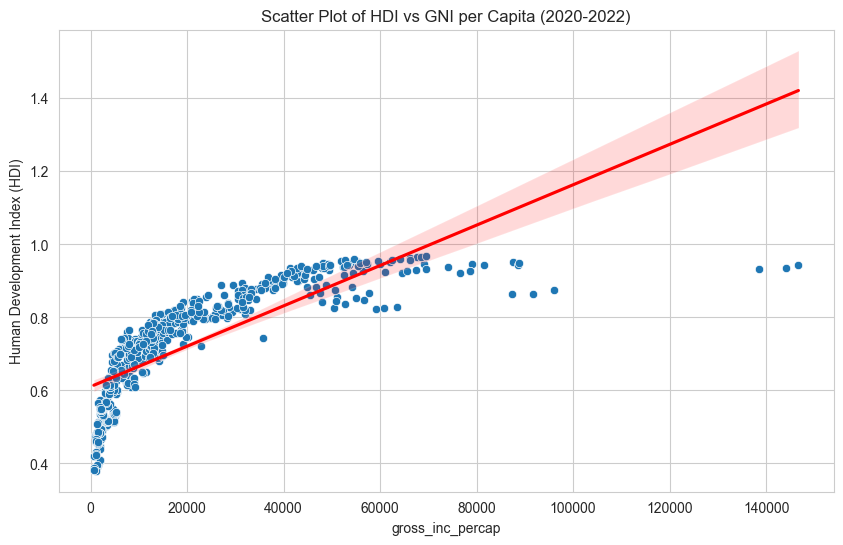

Interpretation of Scatter Plot (HDI vs GNI per Capita):

1. **Major Trend:** There is a strong positive correlation between Gross National Income (GNI) per capita and the Human Development Index (HDI). Generally, countries with higher incomes exhibit higher human development scores.

2. **Pattern (Diminishing Returns):** The relationship is clearly non-linear (logarithmic). HDI rises steeply as income increases from 0 to approx. 40,000, but the curve flattens (plateaus) for incomes above 60,000. This indicates that after a certain level of wealth, additional income yields diminishing returns on development metrics.

3. **Visual Anomaly (The Regression Line):** The linear regression line (red) is a poor fit for this dataset. It fails to capture the curvature of the data and erroneously predicts HDI values greater than the maximum possible score of 1.0 for high-income regions.

4. **Outliers:** There are a few data points on the far right representing nations with extreme wealth (GNI > 1

In [185]:
# If available:
# · Create a scatter plot using HDI as the dependent variable.
# · Use GNI per Capita on the x-axis.
if 'gross_inc_percap' in HDI_problem_1B_df.columns:
      plt.figure(figsize=(10, 6))
      sns.scatterplot(data=HDI_problem_1B_df, x='gross_inc_percap', y='hdi')
      plt.title('Scatter Plot of HDI vs GNI per Capita (2020-2022)')
      plt.xlabel('GNI per Capita')
      # Add a regrssion line
      sns.regplot(data=HDI_problem_1B_df, x='gross_inc_percap', y='hdi', scatter=False, color='red')
      plt.ylabel('Human Development Index (HDI)')
      plt.show()

      print("Interpretation of Scatter Plot (HDI vs GNI per Capita):\n\n"
            "1. **Major Trend:** There is a strong positive correlation between Gross National Income (GNI) per capita and the Human Development Index (HDI). Generally, countries with higher incomes exhibit higher human development scores.\n\n"
            "2. **Pattern (Diminishing Returns):** The relationship is clearly non-linear (logarithmic). HDI rises steeply as income increases from 0 to approx. 40,000, but the curve flattens (plateaus) for incomes above 60,000. This indicates that after a certain level of wealth, additional income yields diminishing returns on development metrics.\n\n"
            "3. **Visual Anomaly (The Regression Line):** The linear regression line (red) is a poor fit for this dataset. It fails to capture the curvature of the data and erroneously predicts HDI values greater than the maximum possible score of 1.0 for high-income regions.\n\n"
            "4. **Outliers:** There are a few data points on the far right representing nations with extreme wealth (GNI > 140,000). Despite having nearly double the income of other developed nations, their HDI remains capped slightly below 1.0, reinforcing the ceiling effect of the index.")


4. Short Analysis Questions

<!-- • Which countries show the greatest improvement in HDI from 2020 to 2022? -->`


In [186]:

# Which countries show the greatest improvement in HDI from 2020 to 2022?

hdi_2020 = HDI_problem_1B_df[HDI_problem_1B_df['year'] == 2020][['country', 'hdi']].set_index('country')
hdi_2022 = HDI_problem_1B_df[HDI_problem_1B_df['year'] == 2022][['country', 'hdi']].set_index('country')

hdi_improvement = (hdi_2022['hdi'] - hdi_2020['hdi']).dropna().sort_values(ascending=False)

print("Countries with Greatest HDI Improvement (2020 to 2022):\n", hdi_improvement.head(10), "\n")

top3 = hdi_improvement.head(3)
top3_countries = ", ".join(top3.index.tolist())
top3_values = ", ".join([f"{v:.3f}" for v in top3.values])

print(
    "From the HDI improvement analysis between 2020 and 2022,\n"
    f"the countries with the biggest increases are: {top3_countries} "
    f"(improvements: {top3_values}).\n"
)

print(
    "As for the highest improvement, the country is",
    hdi_improvement.idxmax(),
    "with an improvement of",
    round(hdi_improvement.max(), 3)
)


Countries with Greatest HDI Improvement (2020 to 2022):
 country
Andorra       0.041
Azerbaijan    0.038
Ecuador       0.031
Maldives      0.025
Mexico        0.024
Tajikistan    0.023
San Marino    0.023
Bahamas       0.022
Kuwait        0.021
Türkiye       0.020
Name: hdi, dtype: float64 

From the HDI improvement analysis between 2020 and 2022,
the countries with the biggest increases are: Andorra, Azerbaijan, Ecuador (improvements: 0.041, 0.038, 0.031).

As for the highest improvement, the country is Andorra with an improvement of 0.041


In [187]:
# • Did any countries experience a decline in HDI? Provide possible reasons.

hdi_decline = hdi_2022['hdi'] - hdi_2020['hdi']
hdi_decline = hdi_decline[hdi_decline < 0].sort_values()
print("Countries with HDI Decline (2020 to 2022):\n", hdi_decline)

print("Reasons: \n")
print("1. Economic downturns or recessions.")
print("2. Political instability or conflicts.")
print("3. Natural disasters or pandemics (e.g., the impact of the COVID-19 pandemic).")
print("4. Reduced access to education and healthcare services.")
print("5. Environmental degradation affecting livelihoods.")

Countries with HDI Decline (2020 to 2022):
 country
Timor-Leste                      -0.067
Ukraine                          -0.028
Afghanistan                      -0.026
Namibia                          -0.024
Lebanon                          -0.019
St. Vincent And The Grenadines   -0.013
Suriname                         -0.012
Eswatini                         -0.012
Gabon                            -0.011
Paraguay                         -0.011
Samoa                            -0.010
Lesotho                          -0.009
Guatemala                        -0.009
Burkina Faso                     -0.008
Myanmar                          -0.007
Mozambique                       -0.006
Yemen                            -0.006
South Africa                     -0.005
Haiti                            -0.005
Costa Rica                       -0.005
Belize                           -0.005
Russia                           -0.005
Slovakia                         -0.005
South Sudan                 

In [188]:
# Which region has highest and lowest HDI across these three years4
# Calculate average HDI by region

average_hdi_by_region_overall = HDI_problem_1B_df.groupby('region')['hdi'].mean().sort_values()
print("Average HDI by Region (2020-2022):\n", average_hdi_by_region_overall)
print("\n")
print("Highest and Lowest HDI Regions:\n")
print("Highest HDI Region:", average_hdi_by_region_overall.idxmax(), "with HDI:", average_hdi_by_region_overall.max())
print("Lowest HDI Region:", average_hdi_by_region_overall.idxmin(), "with HDI:", average_hdi_by_region_overall.min())

Average HDI by Region (2020-2022):
 region
Western Africa               0.503479
Eastern Africa               0.542000
Middle Africa                0.554000
Melanesia                    0.616417
Southern Africa              0.635067
Southern Asia                0.655000
Northern Africa              0.691167
Micronesia                   0.697333
Polynesia                    0.698333
Central America              0.709083
South-eastern Asia           0.720030
Central Asia                 0.725867
South America                0.757139
Caribbean                    0.759846
Western Asia                 0.779148
Eastern Europe               0.823700
Southern Europe              0.852833
Eastern Asia                 0.864600
Northern Europe              0.927967
Northern America             0.928000
Western Europe               0.934750
Australia and New Zealand    0.942167
Name: hdi, dtype: float64


Highest and Lowest HDI Regions:

Highest HDI Region: Australia and New Zealand with HDI: 0.94

In [189]:
# # Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
# this period.

print("The COVID-19 pandemic, which began in late 2019 and continued through 2020 and beyond, had profound impacts on global health, economies, and social structures. These disruptions likely influenced HDI trends in several ways:\n")
print("1. Health Impact: The pandemic strained healthcare systems worldwide, leading to increased mortality rates and reduced life expectancy in many countries. This would negatively affect the health component of HDI.\n")
print("2. Economic Consequences: Lockdowns and restrictions led to economic slowdowns, job losses, and reduced income levels, impacting the standard of living component of HDI.\n")
print("3. Education Disruptions: School closures and shifts to remote learning affected educational attainment, particularly in regions with limited access to technology, thereby influencing the education component of HDI.\n")
print("Overall, the pandemic likely caused stagnation or declines in HDI for many countries during this period, highlighting the vulnerability of human development to global crises.")


The COVID-19 pandemic, which began in late 2019 and continued through 2020 and beyond, had profound impacts on global health, economies, and social structures. These disruptions likely influenced HDI trends in several ways:

1. Health Impact: The pandemic strained healthcare systems worldwide, leading to increased mortality rates and reduced life expectancy in many countries. This would negatively affect the health component of HDI.

2. Economic Consequences: Lockdowns and restrictions led to economic slowdowns, job losses, and reduced income levels, impacting the standard of living component of HDI.

3. Education Disruptions: School closures and shifts to remote learning affected educational attainment, particularly in regions with limited access to technology, thereby influencing the education component of HDI.

Overall, the pandemic likely caused stagnation or declines in HDI for many countries during this period, highlighting the vulnerability of human development to global crises.

***

***

PROBLEM-2

ADVANCE HDI EXPLORATION

In [190]:

# 1) Create South Asia Subset
south_asia_list = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India',
                   'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

south_asia_df = original_df[original_df['country'].isin(south_asia_list)].copy()

# Make sure key columns are numeric (important for score/outliers)
for col in ['hdi', 'life_expectancy', 'gross_inc_percap', 'gender_development']:
    if col in south_asia_df.columns:
        south_asia_df[col] = pd.to_numeric(south_asia_df[col], errors='coerce')

south_asia_df.to_csv('HDI_SouthAsia.csv', index=False)
south_asia_df.head(10)



,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
5,6,AFG,Afghanistan,1995,0.318,52.544,16.418912,NaN,NaN,54.087,...,NaN,NaN,1.676049,9.093722,NaN,NaN,NaN,NaN,0.086321,2.1968
6,7,AFG,Afghanistan,1996,0.326,53.243,17.106596,NaN,NaN,54.806,...,NaN,NaN,1.773336,9.246831,NaN,NaN,NaN,NaN,0.080092,2.0402
7,8,AFG,Afghanistan,1997,0.330,53.634,17.788819,NaN,NaN,55.151,...,NaN,NaN,1.870624,9.399939,NaN,NaN,NaN,NaN,0.073316,2.1297
8,9,AFG,Afghanistan,1998,0.329,52.943,18.493132,NaN,NaN,54.818,...,NaN,NaN,1.967912,9.553048,NaN,NaN,NaN,NaN,0.069134,2.2010
9,10,AFG,Afghanistan,1999,0.337,54.846,19.262847,NaN,NaN,56.300,...,NaN,NaN,2.065200,9.706157,NaN,NaN,NaN,NaN,0.056669,2.0832


In [191]:
# 2. Composite Development Score:

# • Create a new metric called Composite Score using the formula:
# Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index
# Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap

# 2) Composite Development Score (normalized within each year)
def minmax(x):
    x = x.astype(float)
    rng = x.max() - x.min()
    if rng == 0 or pd.isna(rng):
        return pd.Series(0.0, index=x.index)
    return (x - x.min()) / rng


# --- Score for YEAR-BY-YEAR rankings (normalize within each year) ---
south_asia_df['life_exp_norm_year'] = south_asia_df.groupby('year')['life_expectancy'].transform(minmax)
south_asia_df['gni_norm_year']      = south_asia_df.groupby('year')['gross_inc_percap'].transform(minmax)

south_asia_df['composite_score_year'] = (
    0.30 * south_asia_df['life_exp_norm_year'] +
    0.30 * south_asia_df['gni_norm_year']
)


south_asia_df['life_exp_norm_global'] = minmax(south_asia_df['life_expectancy'])
south_asia_df['gni_norm_global']      = minmax(south_asia_df['gross_inc_percap'])

south_asia_df['composite_score_global'] = (
    0.30 * south_asia_df['life_exp_norm_global'] +
    0.30 * south_asia_df['gni_norm_global']
)




In [192]:


south_asia_df.head(10)


for year in sorted(south_asia_df['year'].unique()):
    yearly_data = south_asia_df[south_asia_df['year'] == year]
    ranked_yearly = yearly_data.sort_values(by='composite_score_year', ascending=False)

    print(f"\n===== Year: {year} =====")

    print(ranked_yearly[['country', 'composite_score_year']])


    print("\n")
# # • Rank South Asian countries based on Composite Score.

average_composite_score = (
    south_asia_df.groupby('country')['composite_score_global']
    .mean()
    .sort_values(ascending=False)
)
print("Average Composite Score Ranking (GLOBAL normalized across all years):\n", average_composite_score)



===== Year: 1990 =====
          country  composite_score_year
3498     Maldives              0.503517
5445    Sri Lanka              0.413495
4356     Pakistan              0.229584
627        Bhutan              0.163271
2541        India              0.159338
429    Bangladesh              0.127462
4059        Nepal              0.102458
0     Afghanistan              0.072701



===== Year: 1991 =====
          country  composite_score_year
3499     Maldives              0.510949
5446    Sri Lanka              0.411889
4357     Pakistan              0.226120
628        Bhutan              0.157537
2542        India              0.157073
4060        Nepal              0.108207
430    Bangladesh              0.099548
1     Afghanistan              0.054258



===== Year: 1992 =====
          country  composite_score_year
3500     Maldives              0.509485
5447    Sri Lanka              0.413712
4358     Pakistan              0.217319
629        Bhutan              0.160117
2543

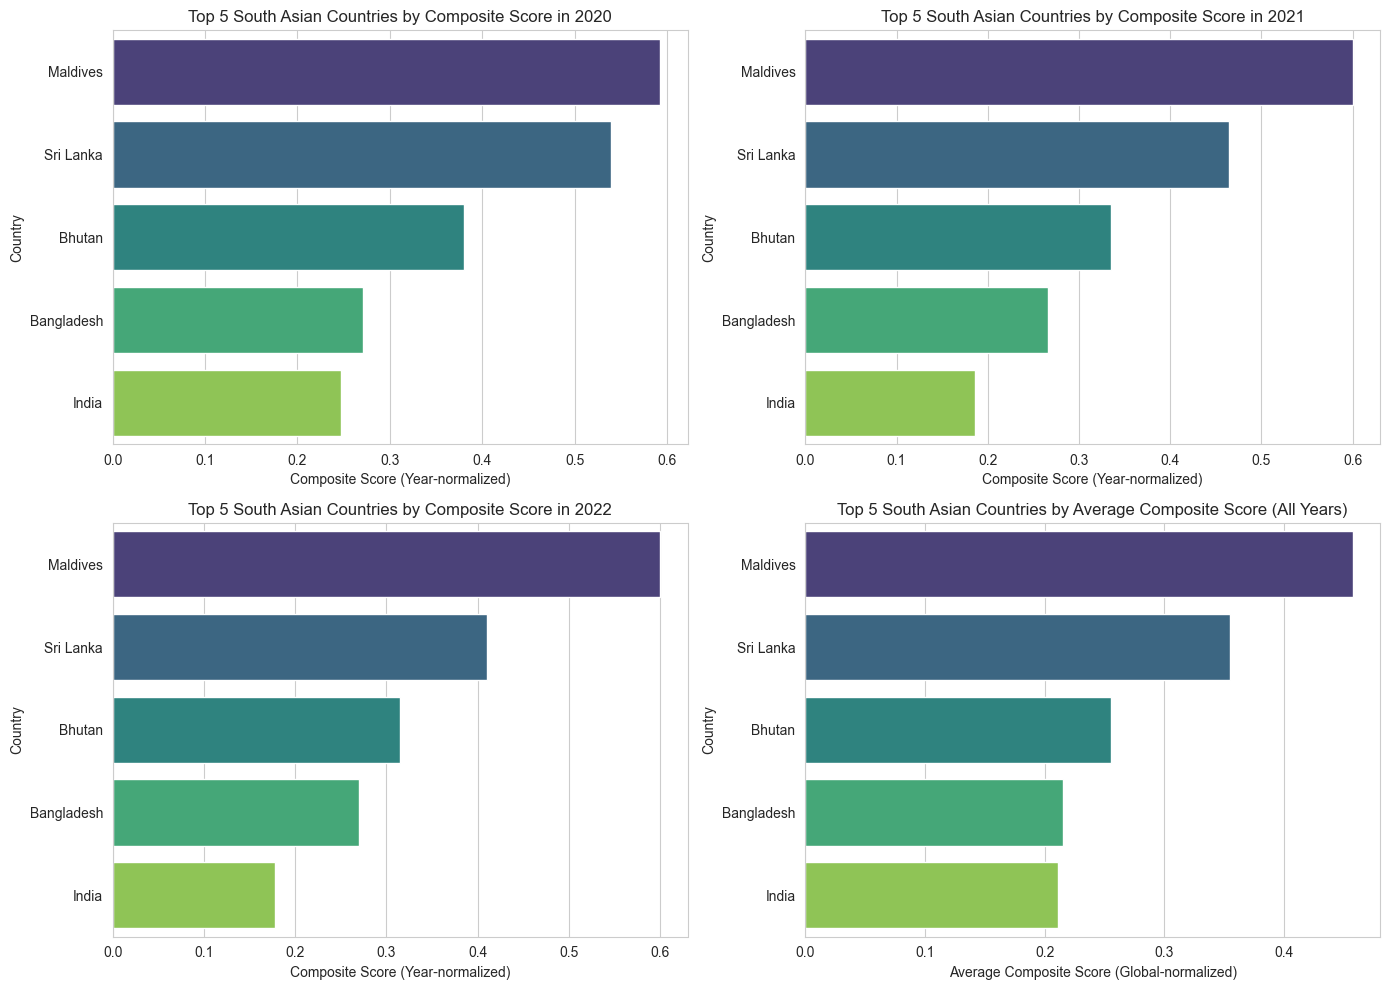

In [193]:

# • Plot the top 5 countries in a horizontal bar chart.
# each year ranking subplots (use composite_score_year)
# then overall average ranking subplot (use composite_score_global)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# select the last 3 years to fit the 2x2 grid (plus one panel for overall average)
years = sorted(south_asia_df['year'].dropna().unique())[-3:]

for i, year in enumerate(years):
    yearly_data = south_asia_df[south_asia_df['year'] == year].copy()

    # use composite_score_year for year-wise ranking
    ranked_yearly = yearly_data.sort_values(by='composite_score_year', ascending=False).head(5)

    ax = axes[i]

    sns.barplot(
        data=ranked_yearly,
        x='composite_score_year',
        y='country',
        hue='country',        
        palette='viridis',
        legend=False,           
        ax=ax
    )


    ax.set_title(f'Top 5 South Asian Countries by Composite Score in {year}')
    ax.set_xlabel('Composite Score (Year-normalized)')
    ax.set_ylabel('Country')

# overall average ranking should use composite_score_global (meaningful across years)
average_rank = (
    south_asia_df.groupby('country')['composite_score_global']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

ax = axes[3]

sns.barplot(
    data=average_rank,
    x='composite_score_global',
    y='country',
    hue='country',         
    palette='viridis',
    legend=False,
    ax=ax
)


ax.set_title('Top 5 South Asian Countries by Average Composite Score (All Years)')
ax.set_xlabel('Average Composite Score (Global-normalized)')
ax.set_ylabel('Country')

plt.tight_layout()
plt.show()


In [194]:
# Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
# differences. 


latest_year = south_asia_df['year'].max()

hdi_rank_2022 = (
    south_asia_df[south_asia_df['year'] == latest_year]
    .set_index('country')['hdi']
    .sort_values(ascending=False)
)

comp_rank_2022 = (
    south_asia_df[south_asia_df['year'] == latest_year]
    .set_index('country')['composite_score_year']   # year-normalized
    .sort_values(ascending=False)
)

print(f"\n--- Rankings for {latest_year} only ---")
print("\nHDI Ranking:\n", hdi_rank_2022)


# Build ranking comparison table (automatic, no hardcoding)
hdi_ranking = south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
composite_ranking = south_asia_df.groupby('country')['composite_score_global'].mean().sort_values(ascending=False)

# Convert to rank positions
hdi_rank_pos = hdi_ranking.rank(ascending=False, method='min').astype(int)
comp_rank_pos = composite_ranking.rank(ascending=False, method='min').astype(int)

comparison = (pd.DataFrame({
    'avg_hdi': hdi_ranking,
    'hdi_rank': hdi_rank_pos,
    'avg_composite': composite_ranking,
    'composite_rank': comp_rank_pos
}).fillna(0))

# Rank difference: + means composite ranks the country better (smaller rank number)
comparison['rank_shift'] = comparison['hdi_rank'] - comparison['composite_rank']
comparison = comparison.sort_values('hdi_rank')

print("\nComparison of Rankings: HDI vs. Composite Score (South Asia)\n")

# Top 2 in HDI vs Top 2 in Composite
top2_hdi = list(hdi_ranking.index[:2])
top2_comp = list(composite_ranking.index[:2])

print("1) Top-tier comparison:")
print(f"   - Top 2 by HDI: {top2_hdi[0]} (1st) > {top2_hdi[1]} (2nd)")
print(f"   - Top 2 by Composite: {top2_comp[0]} (1st) > {top2_comp[1]} (2nd)")

if top2_hdi != top2_comp:
    print("   - Note: The top positions differ because the composite score reflects relative standing in")
    print("     normalized life expectancy and normalized income within the region.")
else:
    print("   - Note: The top positions are consistent across both metrics.")

# Biggest upward and downward shifts
most_up = comparison.sort_values('rank_shift', ascending=False).head(1).index[0]
most_down = comparison.sort_values('rank_shift', ascending=True).head(1).index[0]

print("\n2) Biggest ranking changes (Composite vs HDI):")
print(f"   - Biggest upward shift: {most_up} (HDI rank {comparison.loc[most_up,'hdi_rank']} -> Composite rank {comparison.loc[most_up,'composite_rank']})")
print(f"   - Biggest downward shift: {most_down} (HDI rank {comparison.loc[most_down,'hdi_rank']} -> Composite rank {comparison.loc[most_down,'composite_rank']})")

# Bottom country in both
bottom_hdi = hdi_ranking.index[-1]
bottom_comp = composite_ranking.index[-1]

print("\n3) Bottom performer:")
print(f"   - Lowest by HDI: {bottom_hdi}")
print(f"   - Lowest by Composite: {bottom_comp}")

print("\nSummary:")
print("The Composite Score is based on normalized life expectancy and normalized income, weighted equally (0.30 each).")
print("Therefore, it reflects relative standing in these two components rather than being dominated by raw income values.")

print("\nDetailed table (avg values + ranks):")
print(comparison[['avg_hdi','hdi_rank','avg_composite','composite_rank','rank_shift']].to_string())





--- Rankings for 2022 only ---

HDI Ranking:
 country
Sri Lanka      0.780
Maldives       0.762
Bhutan         0.681
Bangladesh     0.670
India          0.644
Nepal          0.601
Pakistan       0.540
Afghanistan    0.462
Name: hdi, dtype: float64

Comparison of Rankings: HDI vs. Composite Score (South Asia)

1) Top-tier comparison:
   - Top 2 by HDI: Sri Lanka (1st) > Maldives (2nd)
   - Top 2 by Composite: Maldives (1st) > Sri Lanka (2nd)
   - Note: The top positions differ because the composite score reflects relative standing in
     normalized life expectancy and normalized income within the region.

2) Biggest ranking changes (Composite vs HDI):
   - Biggest upward shift: Maldives (HDI rank 2 -> Composite rank 1)
   - Biggest downward shift: Sri Lanka (HDI rank 1 -> Composite rank 2)

3) Bottom performer:
   - Lowest by HDI: Afghanistan
   - Lowest by Composite: Afghanistan

Summary:
The Composite Score is based on normalized life expectancy and normalized income, weighted equal

3. Outlier Detection:


In [195]:

# • Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule

def detect_outliers_iqr(data, column):
    # Ensure numeric (prevents issues if column is object/string)
    s = pd.to_numeric(data[column], errors='coerce')

    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(s < lower_bound) | (s > upper_bound)].copy()
    return outliers

hdi_outliers = detect_outliers_iqr(south_asia_df, 'hdi')
gni_outliers = detect_outliers_iqr(south_asia_df, 'gross_inc_percap')

print("HDI Outliers in South Asia:\n", hdi_outliers[['country', 'year', 'hdi']])
print("\nGNI per Capita Outliers in South Asia:\n", gni_outliers[['country', 'year', 'gross_inc_percap']])

# Average outlier values (handle empty case cleanly)
if hdi_outliers.empty:
    print("\nAverage HDI Outlier Value: No HDI outliers found")
else:
    print(f"\nAverage HDI Outlier Value: {hdi_outliers['hdi'].mean()}")

if gni_outliers.empty:
    print("Average GNI per Capita Outlier Value: No GNI outliers found")
else:
    print(f"Average GNI per Capita Outlier Value: {gni_outliers['gross_inc_percap'].mean()}")



HDI Outliers in South Asia:
 Empty DataFrame
Columns: [country, year, hdi]
Index: []

GNI per Capita Outliers in South Asia:
         country  year  gross_inc_percap
3511   Maldives  2003       14543.14634
3512   Maldives  2004       15287.20714
3514   Maldives  2006       16391.40757
3515   Maldives  2007       14162.42816
3516   Maldives  2008       15423.81910
3517   Maldives  2009       14050.92438
3518   Maldives  2010       14363.23615
3519   Maldives  2011       15300.31364
3520   Maldives  2012       15355.44089
3521   Maldives  2013       15648.36655
3522   Maldives  2014       16410.16419
3523   Maldives  2015       16414.93039
3524   Maldives  2016       16911.45422
3525   Maldives  2017       17474.64201
3526   Maldives  2018       18055.72465
3527   Maldives  2019       18679.92536
3529   Maldives  2021       16857.60546
3530   Maldives  2022       18846.79219
5473  Sri Lanka  2018       13405.80369

Average HDI Outlier Value: No HDI outliers found
Average GNI per Capita O

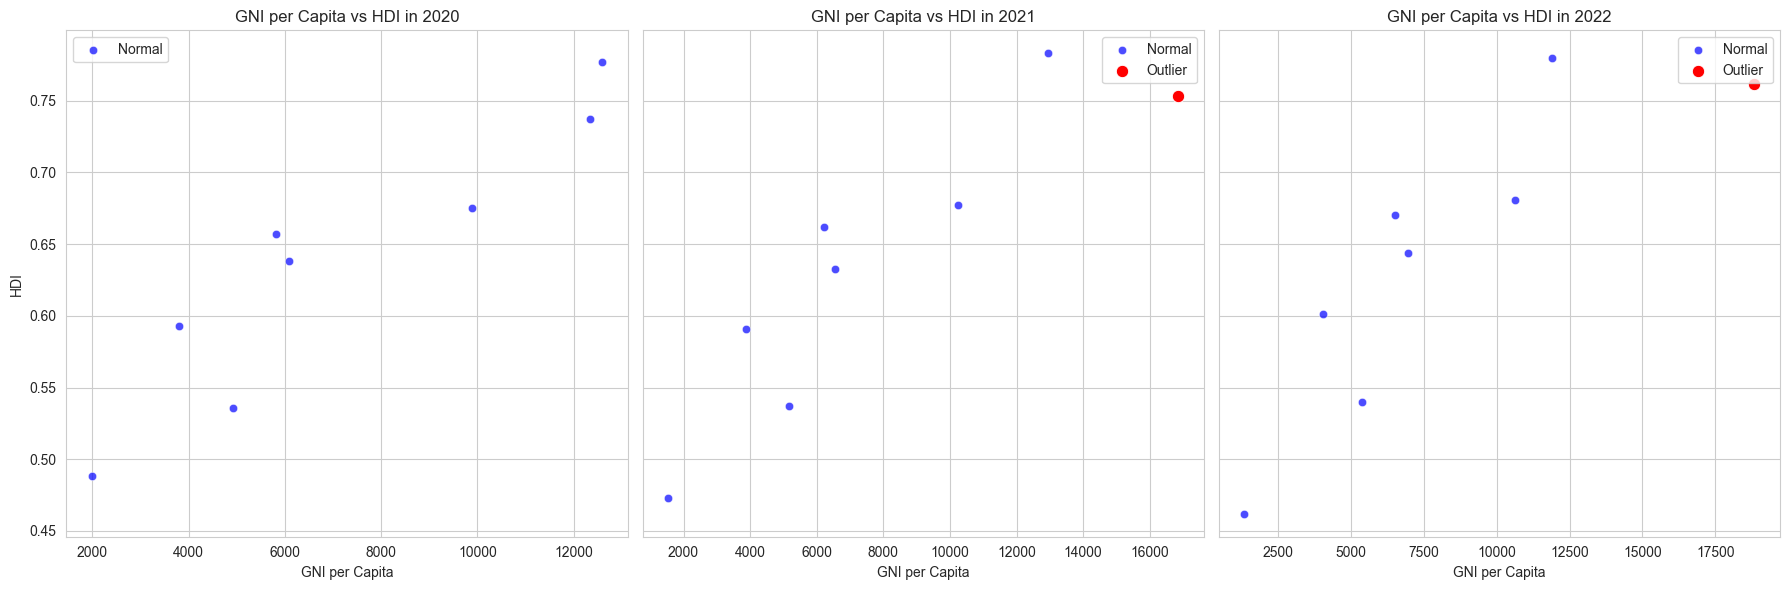

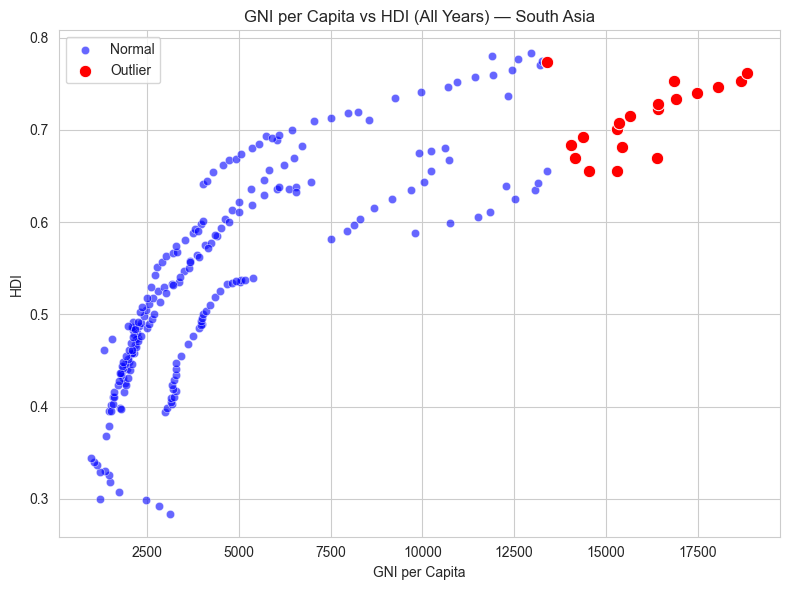

In [196]:

# • Create scatter plots of GNI per Capita vs HDI, highlighting outliers in a different color.
# by each year in subplot (last 3 years)

unique_years = sorted(south_asia_df['year'].dropna().unique())
n_plots = min(3, len(unique_years))
years = unique_years[-n_plots:]

fig, axes = plt.subplots(1, n_plots, figsize=(6 * n_plots, 6), sharey=True)

if n_plots == 1:
    axes = [axes]

for i, year in enumerate(years):
    yearly_data = south_asia_df[south_asia_df['year'] == year].copy()
    ax = axes[i]

    # Normal points
    sns.scatterplot(
        data=yearly_data,
        x='gross_inc_percap',
        y='hdi',
        ax=ax,
        label='Normal',
        color='blue',
        alpha=0.7
    )

    # Outliers for this year (union of HDI outliers and GNI outliers)
    yearly_outliers = pd.concat([
        hdi_outliers[hdi_outliers['year'] == year],
        gni_outliers[gni_outliers['year'] == year]
    ]).drop_duplicates()

    # Highlight outliers if any exist
    if not yearly_outliers.empty:
        sns.scatterplot(
            data=yearly_outliers,
            x='gross_inc_percap',
            y='hdi',
            ax=ax,
            label='Outlier',
            color='red',
            s=80
        )

    ax.set_title(f'GNI per Capita vs HDI in {year}')
    ax.set_xlabel('GNI per Capita')
    ax.set_ylabel('HDI')
    ax.legend()

plt.tight_layout()
plt.show()

# ---- All years combined ----
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=south_asia_df,
    x='gross_inc_percap',
    y='hdi',
    label='Normal',
    color='blue',
    alpha=0.6
)

outliers_all = pd.concat([hdi_outliers, gni_outliers]).drop_duplicates()

if not outliers_all.empty:
    sns.scatterplot(
        data=outliers_all,
        x='gross_inc_percap',
        y='hdi',
        label='Outlier',
        color='red',
        s=80
    )

plt.title('GNI per Capita vs HDI (All Years) — South Asia')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.legend()
plt.tight_layout()
plt.show()


In [197]:


# Summarize 
hdi_outlier_countries = sorted(hdi_outliers['country'].unique()) if not hdi_outliers.empty else []
gni_outlier_countries = sorted(gni_outliers['country'].unique()) if not gni_outliers.empty else []


if len(hdi_outlier_countries) == 0:
    print("1) HDI Outliers:")
    print("   - Using the 1.5×IQR rule, no HDI outliers were detected in the South Asia subset.")
    print("   - This suggests HDI values are comparatively clustered within the region across the years.")
else:
    print("1) HDI Outliers:")
    print(f"   - HDI outliers were detected for: {', '.join(hdi_outlier_countries)}.")
    print("   - These points likely represent years where human development changed unusually compared to the regional pattern.")

if len(gni_outlier_countries) == 0:
    print("\n2) GNI per Capita Outliers:")
    print("   - Using the 1.5×IQR rule, no GNI per Capita outliers were detected.")
else:
    print("\n2) GNI per Capita Outliers:")
    print(f"   - GNI per Capita outliers were detected for: {', '.join(gni_outlier_countries)}.")
    print("   - These stand out because their income levels are much higher (or lower) than the regional distribution.")
    print("   - A common reason is that some countries have economic structures (e.g., tourism/service-driven economies, remittances,")
    print("     smaller populations, or policy shocks) that push income far away from the South Asia average.")

print("\n3) Interpretation of the Scatter Plot (GNI vs HDI):")
print("   - Outliers appear far from the main cluster, indicating countries whose income does not align with typical regional patterns.")
print("   - If a country has very high GNI but only moderate HDI, it may indicate inequality, uneven service access,")
print("     or that income gains have not fully converted into broad improvements in health/education.")
print("   - If a country has relatively low GNI but better HDI than expected, it may indicate efficient social investment and policies.")



1) HDI Outliers:
   - Using the 1.5×IQR rule, no HDI outliers were detected in the South Asia subset.
   - This suggests HDI values are comparatively clustered within the region across the years.

2) GNI per Capita Outliers:
   - GNI per Capita outliers were detected for: Maldives, Sri Lanka.
   - These stand out because their income levels are much higher (or lower) than the regional distribution.
   - A common reason is that some countries have economic structures (e.g., tourism/service-driven economies, remittances,
     smaller populations, or policy shocks) that push income far away from the South Asia average.

3) Interpretation of the Scatter Plot (GNI vs HDI):
   - Outliers appear far from the main cluster, indicating countries whose income does not align with typical regional patterns.
   - If a country has very high GNI but only moderate HDI, it may indicate inequality, uneven service access,
     or that income gains have not fully converted into broad improvements in health

4. Exploring Metric Relationships:

In [198]:

# Selection of two columns to find Pearson correlation with HDI
cols = ['gender_development', 'life_expectancy', 'hdi']

# Ensure numeric (important if dataset has strings)
for c in cols:
    south_asia_df[c] = pd.to_numeric(south_asia_df[c], errors='coerce')

# Drop rows where any of the needed values are missing
corr_df = south_asia_df.dropna(subset=cols)

# Pearson correlation with HDI
correlation = corr_df[['gender_development', 'life_expectancy']].corrwith(corr_df['hdi'], method='pearson')

print("Pearson Correlation with HDI:\n", correlation)
print("\nNumber of rows used in correlation:", len(corr_df))


Pearson Correlation with HDI:
 gender_development    0.865621
life_expectancy       0.948775
dtype: float64

Number of rows used in correlation: 221


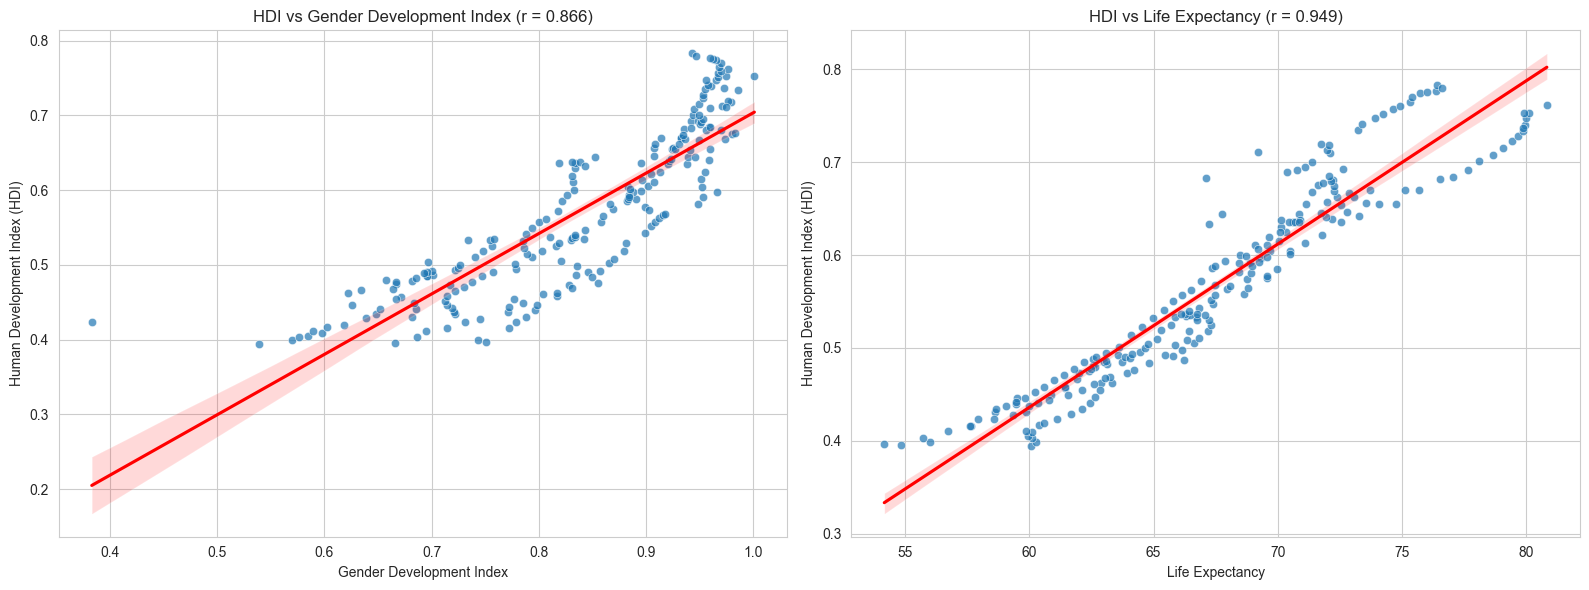

In [199]:

# Create scatterplots with trendlines to visualize the relationship
# HDI vs Gender Development Index and HDI vs Life Expectancy

# 1) Ensure numeric and remove missing values for clean plots
plot_df = south_asia_df.copy()
for c in ['gender_development', 'life_expectancy', 'hdi']:
    plot_df[c] = pd.to_numeric(plot_df[c], errors='coerce')

plot_df = plot_df.dropna(subset=['gender_development', 'life_expectancy', 'hdi'])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# HDI vs Gender Development Index
sns.scatterplot(data=plot_df, x='gender_development', y='hdi', ax=axes[0], alpha=0.7)
sns.regplot(data=plot_df, x='gender_development', y='hdi', scatter=False, color='red', ax=axes[0])

r_gdi = plot_df['gender_development'].corr(plot_df['hdi'])
axes[0].set_title(f'HDI vs Gender Development Index (r = {r_gdi:.3f})')
axes[0].set_xlabel('Gender Development Index')
axes[0].set_ylabel('Human Development Index (HDI)')

# HDI vs Life Expectancy
sns.scatterplot(data=plot_df, x='life_expectancy', y='hdi', ax=axes[1], alpha=0.7)
sns.regplot(data=plot_df, x='life_expectancy', y='hdi', scatter=False, color='red', ax=axes[1])

r_le = plot_df['life_expectancy'].corr(plot_df['hdi'])
axes[1].set_title(f'HDI vs Life Expectancy (r = {r_le:.3f})')
axes[1].set_xlabel('Life Expectancy')
axes[1].set_ylabel('Human Development Index (HDI)')

plt.tight_layout()
plt.show()


In [200]:


# Identify strongest/weakest dynamically (avoids hardcoding)
strongest_metric = correlation.abs().idxmax()
weakest_metric = correlation.abs().idxmin()

print("1) Pearson Correlation Summary:")
for metric, r in correlation.items():
    print(f"   - Correlation(Hdi, {metric}) = {r:.3f}")

print("\n2) Strongest vs Weakest Relationship:")
print(f"   - Strongest relationship with HDI: {strongest_metric} (|r| is highest).")
print(f"   - Weakest relationship with HDI: {weakest_metric} (|r| is lowest).")

print("\n3) Interpretation:")
print("   - A stronger positive correlation means HDI tends to increase when that metric increases.")
print("   - If life expectancy shows the strongest link, it suggests health improvements closely track human development progress.")
print("   - If gender development shows a weaker relationship (even if still positive), it may reflect that gender equality changes")
print("     can be slower, more policy-dependent, and influenced by social factors not captured equally across time.")



1) Pearson Correlation Summary:
   - Correlation(Hdi, gender_development) = 0.866
   - Correlation(Hdi, life_expectancy) = 0.949

2) Strongest vs Weakest Relationship:
   - Strongest relationship with HDI: life_expectancy (|r| is highest).
   - Weakest relationship with HDI: gender_development (|r| is lowest).

3) Interpretation:
   - A stronger positive correlation means HDI tends to increase when that metric increases.
   - If life expectancy shows the strongest link, it suggests health improvements closely track human development progress.
   - If gender development shows a weaker relationship (even if still positive), it may reflect that gender equality changes
     can be slower, more policy-dependent, and influenced by social factors not captured equally across time.


5 - Gap Analysis

In [201]:
# Gap Analysis (Standardized gap to get real positive/negative values)
print("I followed the assignment definition for the raw gap, and additionally computed a standardized gap (zGNI − zHDI) as an extra insight because the raw scale is dominated by income.")

# Ensure numeric
south_asia_df['gross_inc_percap'] = pd.to_numeric(south_asia_df['gross_inc_percap'], errors='coerce')
south_asia_df['hdi'] = pd.to_numeric(south_asia_df['hdi'], errors='coerce')


gap_df = south_asia_df.loc[
    south_asia_df[['gross_inc_percap', 'hdi', 'country']].notna().all(axis=1)
].copy()

# Safe standard deviations (avoid divide-by-zero)
gni_std = gap_df['gross_inc_percap'].std()
hdi_std = gap_df['hdi'].std()

gap_df.loc[:, 'gni_z'] = (gap_df['gross_inc_percap'] - gap_df['gross_inc_percap'].mean()) / (gni_std if gni_std != 0 else 1)
gap_df.loc[:, 'hdi_z'] = (gap_df['hdi'] - gap_df['hdi'].mean()) / (hdi_std if hdi_std != 0 else 1)

# Standardized gap
gap_df.loc[:, 'gni_hdi_gap'] = gap_df['gni_z'] - gap_df['hdi_z']

# Average gap per country across years
average_gni_hdi_gap = gap_df.groupby('country')['gni_hdi_gap'].mean()

top_positive_avg_gap = average_gni_hdi_gap.sort_values(ascending=False).head(3)
top_negative_avg_gap = average_gni_hdi_gap.sort_values(ascending=True).head(3)

print("Top 3 Countries with Highest Average Positive GNI–HDI Gaps:\n", top_positive_avg_gap)
print("\nTop 3 Countries with Highest Average Negative GNI–HDI Gaps:\n", top_negative_avg_gap)



I followed the assignment definition for the raw gap, and additionally computed a standardized gap (zGNI − zHDI) as an extra insight because the raw scale is dominated by income.
Top 3 Countries with Highest Average Positive GNI–HDI Gaps:
 country
Maldives       1.001915
Afghanistan    0.413626
Pakistan       0.293476
Name: gni_hdi_gap, dtype: float64

Top 3 Countries with Highest Average Negative GNI–HDI Gaps:
 country
Sri Lanka    -0.735578
India        -0.307851
Bangladesh   -0.305643
Name: gni_hdi_gap, dtype: float64


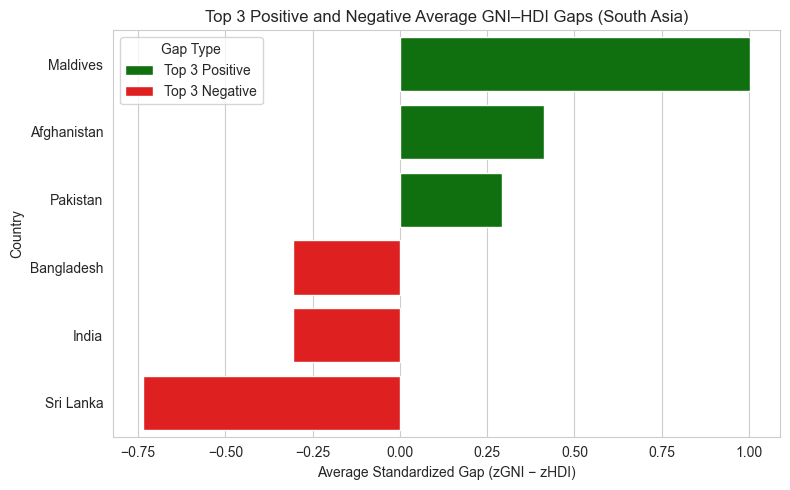

In [202]:

# Plotting top 3 positive and negative gaps (standardized zGNI − zHDI)

gap_data = pd.concat([
    top_positive_avg_gap.rename('GNI–HDI Gap').to_frame().assign(Type='Top 3 Positive'),
    top_negative_avg_gap.rename('GNI–HDI Gap').to_frame().assign(Type='Top 3 Negative')
]).reset_index()  # brings 'country' back as a column

gap_data = gap_data.sort_values('GNI–HDI Gap', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=gap_data,
    x='GNI–HDI Gap',
    y='country',
    hue='Type',
    dodge=False,
    palette={'Top 3 Positive': 'green', 'Top 3 Negative': 'red'}
)

plt.title('Top 3 Positive and Negative Average GNI–HDI Gaps (South Asia)')
plt.xlabel('Average Standardized Gap (zGNI − zHDI)')  
plt.ylabel('Country')
plt.legend(title='Gap Type')
plt.tight_layout()
plt.show()


***
***

PROBLEM - 3

In [203]:
# 1. Create Middle East Subset

# south_asia_list = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
middle_east_list = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [204]:
# Filter the dataset from Problem 1B (HDI_problem1B.csv) to create subsets for South Asia and Middle East.


# Load the cleaned Problem 1B dataset
hdi_problem1b_df = pd.read_csv('HDI_problem1B.csv')

# Standardize country names for matching
hdi_problem1b_df['country'] = hdi_problem1b_df['country'].str.title()

# Filter for South Asia
south_asia_subset = hdi_problem1b_df[hdi_problem1b_df['country'].isin(south_asia_list)].copy()
south_asia_subset.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)

# Filter for Middle East
middle_east_subset = hdi_problem1b_df[hdi_problem1b_df['country'].isin(middle_east_list)].copy()
middle_east_subset.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)

print("South Asia and Middle East subsets created and saved as CSV files.")

South Asia and Middle East subsets created and saved as CSV files.


2. Descriptive Statstics

In [205]:

def region_stats(region_df, region_name):
    mean_hdi = region_df["hdi"].mean()
    std_hdi = region_df["hdi"].std()
    print(f"{region_name} — Mean HDI (2020–2022): {mean_hdi:.4f}, Std: {std_hdi:.4f}")
    return mean_hdi, std_hdi

sa_mean, sa_std = region_stats(south_asia_subset, "South Asia")
me_mean, me_std = region_stats(middle_east_subset, "Middle East")

better = "Middle East" if me_mean > sa_mean else "South Asia"
print("Region performing better on average:", better)


South Asia — Mean HDI (2020–2022): 0.6396, Std: 0.0983
Middle East — Mean HDI (2020–2022): 0.7889, Std: 0.1413
Region performing better on average: Middle East


In [206]:
# Identify which region performs better in general


print("Regional Comparison:")
if south_asia_subset['hdi'].mean() > middle_east_subset['hdi'].mean():
    print(f"South Asia has a higher average HDI ({south_asia_subset['hdi'].mean():.4f}) compared to Middle East ({middle_east_subset['hdi'].mean():.4f})")
else:
    print(f"Middle East has a higher average HDI ({middle_east_subset['hdi'].mean():.4f}) compared to South Asia ({south_asia_subset['hdi'].mean():.4f})")

Regional Comparison:
Middle East has a higher average HDI (0.7889) compared to South Asia (0.6396)


3. Top and Bottom Performers:

In [207]:

sa_country_avg = south_asia_subset.groupby("country", as_index=False)["hdi"].mean()
me_country_avg = middle_east_subset.groupby("country", as_index=False)["hdi"].mean()

sa_top3 = sa_country_avg.sort_values("hdi", ascending=False).head(3)
sa_bottom3 = sa_country_avg.sort_values("hdi", ascending=True).head(3)

me_top3 = me_country_avg.sort_values("hdi", ascending=False).head(3)
me_bottom3 = me_country_avg.sort_values("hdi", ascending=True).head(3)

print("South Asia Top 3 (Avg HDI 2020–2022):\n", sa_top3)
print("\nSouth Asia Bottom 3 (Avg HDI 2020–2022):\n", sa_bottom3)

print("\nMiddle East Top 3 (Avg HDI 2020–2022):\n", me_top3)
print("\nMiddle East Bottom 3 (Avg HDI 2020–2022):\n", me_bottom3)


South Asia Top 3 (Avg HDI 2020–2022):
      country       hdi
7  Sri Lanka  0.780000
4   Maldives  0.750667
2     Bhutan  0.677667

South Asia Bottom 3 (Avg HDI 2020–2022):
        country       hdi
0  Afghanistan  0.474333
6     Pakistan  0.537667
5        Nepal  0.595000

Middle East Top 3 (Avg HDI 2020–2022):
                 country       hdi
9  United Arab Emirates  0.932667
2                Israel  0.910667
0               Bahrain  0.885333

Middle East Bottom 3 (Avg HDI 2020–2022):
     country       hdi
10    Yemen  0.426333
1      Iraq  0.667000
5   Lebanon  0.730000


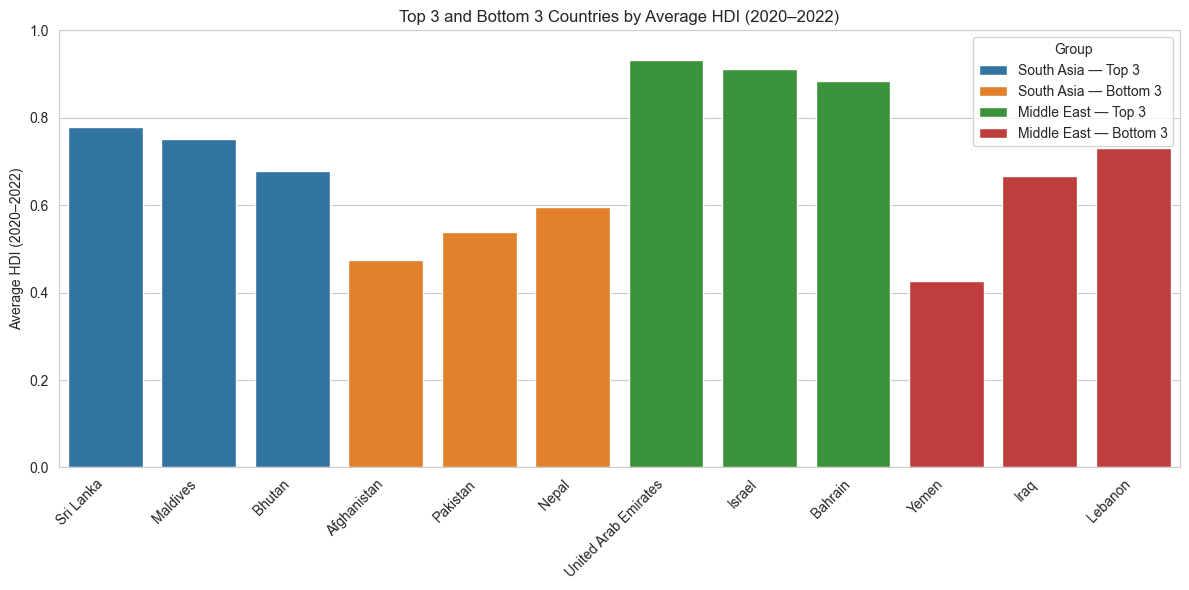

In [208]:

top_bottom = pd.concat([
    sa_top3.assign(Group="South Asia — Top 3"),
    sa_bottom3.assign(Group="South Asia — Bottom 3"),
    me_top3.assign(Group="Middle East — Top 3"),
    me_bottom3.assign(Group="Middle East — Bottom 3")
], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_bottom, x="country", y="hdi", hue="Group")
plt.title("Top 3 and Bottom 3 Countries by Average HDI (2020–2022)")
plt.ylabel("Average HDI (2020–2022)")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


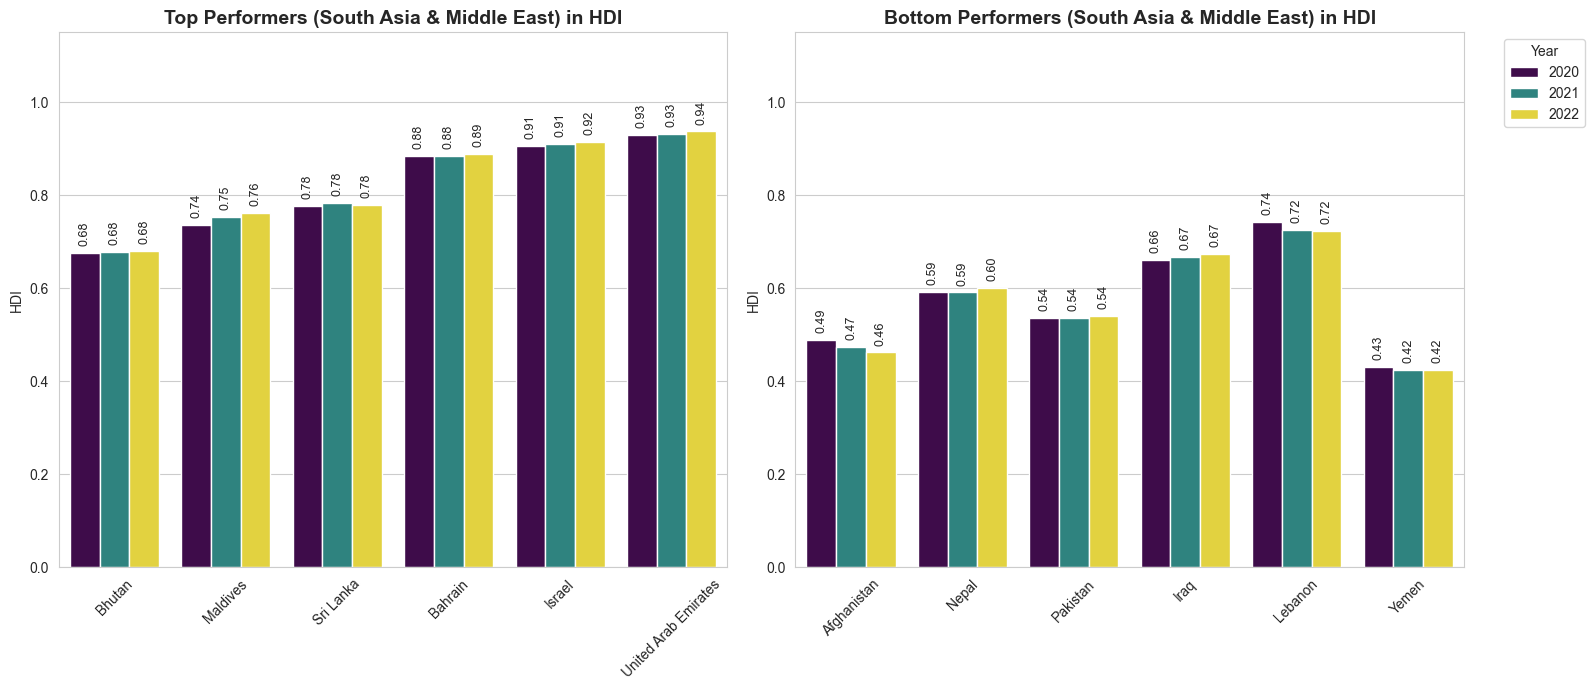

In [209]:


# 1. Combine Yearly Data & Tag Regions
# Create the required yearly top/bottom dataframes from the region subsets
# (sa_top3, sa_bottom3, me_top3, me_bottom3 were computed earlier as avg HDI rankings)

hdi_top_3_south_asia = south_asia_subset[south_asia_subset['country'].isin(sa_top3['country'])].copy()
hdi_bottom_3_south_asia = south_asia_subset[south_asia_subset['country'].isin(sa_bottom3['country'])].copy()

hdi_top_3_middle_east = middle_east_subset[middle_east_subset['country'].isin(me_top3['country'])].copy()
hdi_bottom_3_middle_east = middle_east_subset[middle_east_subset['country'].isin(me_bottom3['country'])].copy()

# We use reset_index() just to be safe, ensuring 'country' is a column available for plotting
df_top_year = pd.concat([
    hdi_top_3_south_asia.assign(Region='South Asia'), 
    hdi_top_3_middle_east.assign(Region='Middle East')
])

df_bot_year = pd.concat([
    hdi_bottom_3_south_asia.assign(Region='South Asia'), 
    hdi_bottom_3_middle_east.assign(Region='Middle East')
])


if 'country' not in df_top_year.columns:
    df_top_year = df_top_year.reset_index().rename(columns={'index': 'country'})
if 'country' not in df_bot_year.columns:
    df_bot_year = df_bot_year.reset_index().rename(columns={'index': 'country'})

# 2. Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Data pairs to iterate over
plot_groups = [
    (df_top_year, "Top Performers (South Asia & Middle East) in HDI"),
    (df_bot_year, "Bottom Performers (South Asia & Middle East) in HDI")
]

for i, (data, title) in enumerate(plot_groups):
    ax = axes[i]
    
    # Plot: X=Country, Y=HDI, Hue=Year
    sns.barplot(
        data=data, 
        x='country', 
        y='hdi', 
        hue='year', 
        palette='viridis', 
        ax=ax
    )
    
    # Titles and Axis Labels
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_ylabel('HDI')
    ax.set_xlabel('')
    ax.set_ylim(0, 1.15) # Extra space at top for vertical text
    
    # Rotate country names
    ax.tick_params(axis='x', rotation=45)

    # Add values on top of bars (Rotated 90 degrees to fit)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=5, rotation=90, fontsize=9)

    # Legend Handling

    if i == 0:
        if ax.get_legend(): ax.get_legend().remove()
    else:
        ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

4. Metric Comparisons:


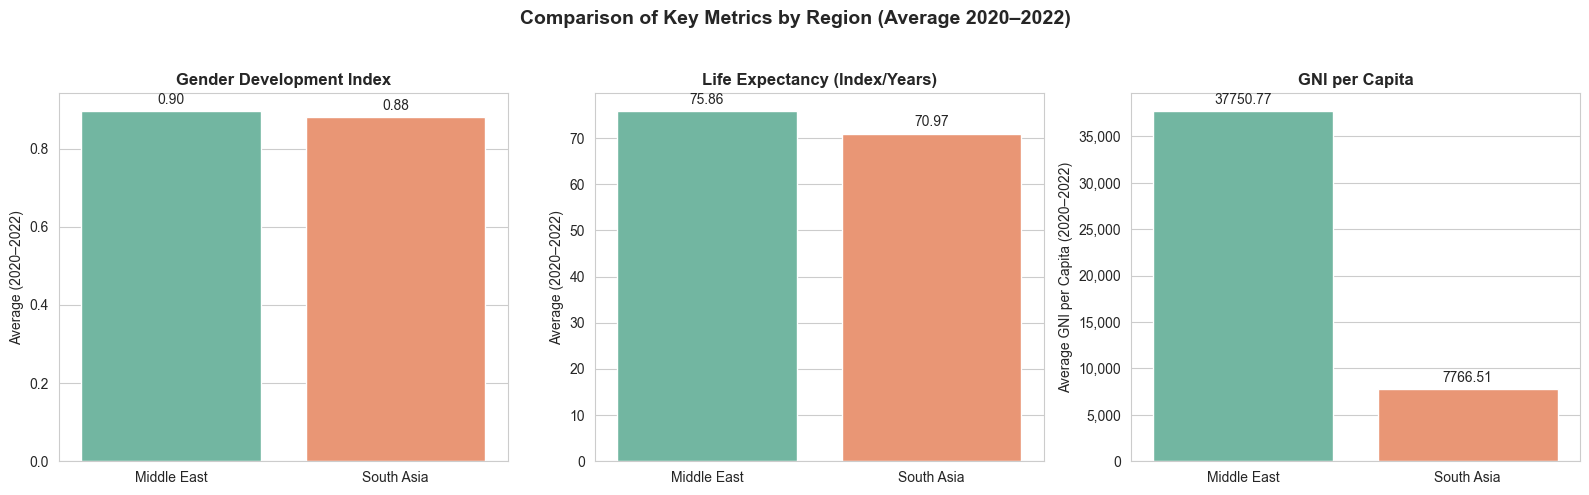

In [210]:

# Combine (use your existing subsets) ---
combined = pd.concat(
    [
        south_asia_subset.assign(Region="South Asia"),
        middle_east_subset.assign(Region="Middle East")
    ],
    ignore_index=True
)

# Metrics + labels (adjust keys if your column names differ) ---
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]
metric_labels = {
    "gender_development": "Gender Development Index",
    "life_expectancy": "Life Expectancy (Index/Years)",
    "gross_inc_percap": "GNI per Capita"
}

# Validate columns exist in *combined* (not df) ---
missing_cols = [m for m in metrics if m not in combined.columns]
if missing_cols:
    raise ValueError(f"Missing metric columns in combined: {missing_cols}\n"
                     f"Available columns: {combined.columns.tolist()}")

# Compute REGION AVERAGES across 2020–2022 ---
region_means = combined.groupby("Region")[metrics].mean().reset_index()

# Plot subplots: 1 row, 3 columns ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Optional formatter for GNI (commas)
comma_fmt = FuncFormatter(lambda x, pos: f"{int(x):,}")

for ax, metric in zip(axes, metrics):
    sns.barplot(
        data=region_means,
        x="Region",
        y=metric,
        hue="Region",
        palette="Set2",
        ax=ax
    )
    ax.set_title(metric_labels[metric], fontsize=12, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Average (2020–2022)")

    # Add value labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3)

    # If metric is GNI, format y-axis with commas
    if metric == "gross_inc_percap":
        ax.yaxis.set_major_formatter(comma_fmt)
        ax.set_ylabel("Average GNI per Capita (2020–2022)")

fig.suptitle("Comparison of Key Metrics by Region (Average 2020–2022)", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


4. Metric Comparisons:


In [211]:

# Disparity BETWEEN regions (difference in region means)

# region_means should already exist from your earlier block:
# region_means = combined.groupby("Region")[metrics].mean().reset_index()

means = region_means.set_index("Region")

disparity_results = {}
for metric in metrics:
    disparity_results[metric] = abs(means.loc["Middle East", metric] - means.loc["South Asia", metric])

# Display disparities
for metric, disparity in disparity_results.items():
    print(f"Disparity in {metric_labels[metric]} (|ME - SA|): {disparity:.4f}")

# Identify greatest disparity
greatest_metric = max(disparity_results, key=disparity_results.get)
print(f"\nGreatest disparity is in {metric_labels[greatest_metric]} "
      f"with a disparity of {disparity_results[greatest_metric]:.4f}")


print(
    f"\nInterpretation:\n"
    f"The metric with the greatest disparity between regions is {metric_labels[greatest_metric]}. "
    f"This indicates that, on average (2020–2022), South Asia and the Middle East differ most in this dimension. "
    f"If the largest gap is GNI per capita, it reflects large differences in economic output and income levels "
    f"between oil/gas-rich or high-income economies and lower-income developing economies. "
    f"If the largest gap is life expectancy or gender development, it suggests stronger divergence in health systems "
    f"or gender equality policies and outcomes."
)




Disparity in Gender Development Index (|ME - SA|): 0.0151
Disparity in Life Expectancy (Index/Years) (|ME - SA|): 4.8854
Disparity in GNI per Capita (|ME - SA|): 29984.2606

Greatest disparity is in GNI per Capita with a disparity of 29984.2606

Interpretation:
The metric with the greatest disparity between regions is GNI per Capita. This indicates that, on average (2020–2022), South Asia and the Middle East differ most in this dimension. If the largest gap is GNI per capita, it reflects large differences in economic output and income levels between oil/gas-rich or high-income economies and lower-income developing economies. If the largest gap is life expectancy or gender development, it suggests stronger divergence in health systems or gender equality policies and outcomes.


HDI Disparity

In [212]:

# Range using country averages across 2020–2022 

sa_country_avg = south_asia_subset.groupby("country")["hdi"].mean()
me_country_avg = middle_east_subset.groupby("country")["hdi"].mean()

hdi_range_south_asia = sa_country_avg.max() - sa_country_avg.min()
hdi_range_middle_east = me_country_avg.max() - me_country_avg.min()

print(f"HDI Range (country avg, 2020–2022) — South Asia: {hdi_range_south_asia:.4f}")
print(f"HDI Range (country avg, 2020–2022) — Middle East: {hdi_range_middle_east:.4f}")


HDI Range (country avg, 2020–2022) — South Asia: 0.3057
HDI Range (country avg, 2020–2022) — Middle East: 0.5063


In [213]:

# A) CV across all observations (country-year rows)
cv_sa_rows = south_asia_subset["hdi"].std() / south_asia_subset["hdi"].mean()
cv_me_rows = middle_east_subset["hdi"].std() / middle_east_subset["hdi"].mean()

# B) CV across country averages 
sa_country_avg = south_asia_subset.groupby("country")["hdi"].mean()
me_country_avg = middle_east_subset.groupby("country")["hdi"].mean()

cv_sa_country = sa_country_avg.std() / sa_country_avg.mean()
cv_me_country = me_country_avg.std() / me_country_avg.mean()

print(f"CV South Asia (all rows, 2020–2022): {cv_sa_rows:.4f}")
print(f"CV Middle East (all rows, 2020–2022): {cv_me_rows:.4f}")

print(f"CV South Asia (country avg): {cv_sa_country:.4f}")
print(f"CV Middle East (country avg): {cv_me_country:.4f}")


CV South Asia (all rows, 2020–2022): 0.1537
CV Middle East (all rows, 2020–2022): 0.1791
CV South Asia (country avg): 0.1605
CV Middle East (country avg): 0.1848


In [214]:

if cv_sa_country - cv_me_country > 0:
    print("South Asia exhibits more variation in HDI.")
elif cv_me_country - cv_sa_country > 0:
    print("Middle East exhibits more variation in HDI.")
else:
    print("Both regions exhibit approximately the same variation in HDI.")


print("CV South Asia:", cv_sa_country)
print("CV Middle East:", cv_me_country)



Middle East exhibits more variation in HDI.
CV South Asia: 0.16047300045280768
CV Middle East: 0.1848451341514189


Correlation Analysis

In [215]:

# --- Correlation Analysis using COUNTRY AVERAGES (2020–2022) ---
# This matches your "average CV" approach

# 1) Aggregate to one row per country (mean over 2020–2022)
sa_avg = south_asia_subset.groupby("country", as_index=False)[
    ["hdi", "gender_development", "life_expectancy"]
].mean()

me_avg = middle_east_subset.groupby("country", as_index=False)[
    ["hdi", "gender_development", "life_expectancy"]
].mean()

# 2) Correlations (Pearson)
corr_sa_gender = sa_avg["hdi"].corr(sa_avg["gender_development"])
corr_sa_life   = sa_avg["hdi"].corr(sa_avg["life_expectancy"])

corr_me_gender = me_avg["hdi"].corr(me_avg["gender_development"])
corr_me_life   = me_avg["hdi"].corr(me_avg["life_expectancy"])

# 3) Display
print(f"South Asia (avg 2020–2022) - Corr(HDI, Gender Dev): {corr_sa_gender:.4f}")
print(f"South Asia (avg 2020–2022) - Corr(HDI, Life Exp):   {corr_sa_life:.4f}")

print(f"Middle East (avg 2020–2022) - Corr(HDI, Gender Dev): {corr_me_gender:.4f}")
print(f"Middle East (avg 2020–2022) - Corr(HDI, Life Exp):   {corr_me_life:.4f}")



South Asia (avg 2020–2022) - Corr(HDI, Gender Dev): 0.8829
South Asia (avg 2020–2022) - Corr(HDI, Life Exp):   0.9448
Middle East (avg 2020–2022) - Corr(HDI, Gender Dev): 0.9367
Middle East (avg 2020–2022) - Corr(HDI, Life Exp):   0.9414


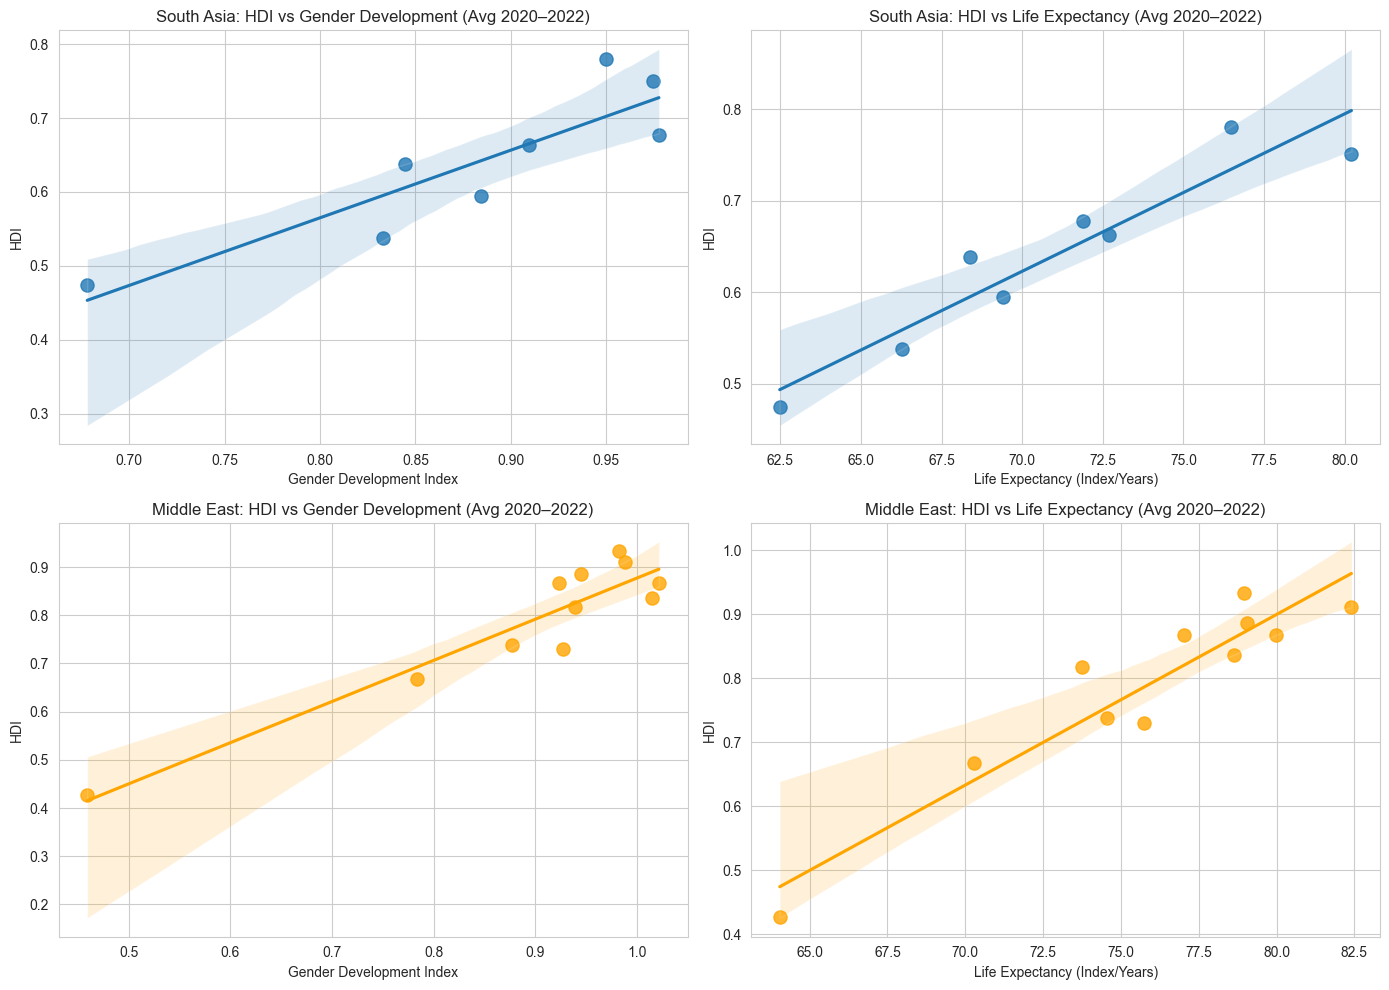

In [216]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# South Asia
sns.regplot(data=sa_avg, x="gender_development", y="hdi", ax=axes[0,0], scatter_kws={"s":90})
axes[0,0].set_title("South Asia: HDI vs Gender Development (Avg 2020–2022)")
axes[0,0].set_xlabel("Gender Development Index")
axes[0,0].set_ylabel("HDI")

sns.regplot(data=sa_avg, x="life_expectancy", y="hdi", ax=axes[0,1], scatter_kws={"s":90})
axes[0,1].set_title("South Asia: HDI vs Life Expectancy (Avg 2020–2022)")
axes[0,1].set_xlabel("Life Expectancy (Index/Years)")
axes[0,1].set_ylabel("HDI")

# Middle East
sns.regplot(data=me_avg, x="gender_development", y="hdi", ax=axes[1,0], scatter_kws={"s":90}, color="orange")
axes[1,0].set_title("Middle East: HDI vs Gender Development (Avg 2020–2022)")
axes[1,0].set_xlabel("Gender Development Index")
axes[1,0].set_ylabel("HDI")

sns.regplot(data=me_avg, x="life_expectancy", y="hdi", ax=axes[1,1], scatter_kws={"s":90}, color="orange")
axes[1,1].set_title("Middle East: HDI vs Life Expectancy (Avg 2020–2022)")
axes[1,1].set_xlabel("Life Expectancy (Index/Years)")
axes[1,1].set_ylabel("HDI")

plt.tight_layout()
plt.show()


In [217]:
# • Interpret the strength and direction of these relationships.


def corr_strength(r):
    """Return strength label based on |r|."""
    ar = abs(r)
    if ar < 0.30:
        return "weak"
    elif ar < 0.70:
        return "moderate"
    else:
        return "strong"

def corr_direction(r):
    """Return direction label based on sign of r."""
    if r > 0:
        return "positive"
    elif r < 0:
        return "negative"
    else:
        return "no linear"

def interpret_corr(region_name, metric_name, r):
    strength = corr_strength(r)
    direction = corr_direction(r)
    print(f"{region_name}: HDI vs {metric_name} -> r = {r:.4f} ({strength} {direction} relationship).")
    
    # one-sentence explanation
    if direction == "positive":
        print(f"Interpretation: As {metric_name} increases, HDI tends to increase in {region_name}.")
    elif direction == "negative":
        print(f"Interpretation: As {metric_name} increases, HDI tends to decrease in {region_name}.")
    else:
        print(f"Interpretation: {metric_name} shows no clear linear association with HDI in {region_name}.")
    
    print("-" * 80)


interpret_corr("South Asia", "Gender Development Index", corr_sa_gender)
interpret_corr("South Asia", "Life Expectancy (Years)", corr_sa_life)

interpret_corr("Middle East", "Gender Development Index", corr_me_gender)
interpret_corr("Middle East", "Life Expectancy (Years)", corr_me_life)


# Compare which metric is more strongly related to HDI within each region
sa_best = "Life Expectancy (Years)" if abs(corr_sa_life) > abs(corr_sa_gender) else "Gender Development Index"
me_best = "Life Expectancy (Years)" if abs(corr_me_life) > abs(corr_me_gender) else "Gender Development Index"

print("Within-region comparison (based on |r|):")
print(f"South Asia: Stronger relationship with HDI is {sa_best}.")
print(f"Middle East: Stronger relationship with HDI is {me_best}.")


if cv_sa_country > cv_me_country:
    print(f"Variation: South Asia shows more variation in HDI (CV={cv_sa_country:.4f}) than Middle East (CV={cv_me_country:.4f}).")
else:
    print(f"Variation: Middle East shows more variation in HDI (CV={cv_me_country:.4f}) than South Asia (CV={cv_sa_country:.4f}).")





South Asia: HDI vs Gender Development Index -> r = 0.8829 (strong positive relationship).
Interpretation: As Gender Development Index increases, HDI tends to increase in South Asia.
--------------------------------------------------------------------------------
South Asia: HDI vs Life Expectancy (Years) -> r = 0.9448 (strong positive relationship).
Interpretation: As Life Expectancy (Years) increases, HDI tends to increase in South Asia.
--------------------------------------------------------------------------------
Middle East: HDI vs Gender Development Index -> r = 0.9367 (strong positive relationship).
Interpretation: As Gender Development Index increases, HDI tends to increase in Middle East.
--------------------------------------------------------------------------------
Middle East: HDI vs Life Expectancy (Years) -> r = 0.9414 (strong positive relationship).
Interpretation: As Life Expectancy (Years) increases, HDI tends to increase in Middle East.
-----------------------------

=== South Asia Outliers (Avg 2020–2022) ===
HDI bounds: (np.float64(0.4078), np.float64(0.8688))
GNI bounds: (np.float64(-4121.08), np.float64(19770.62))
Outlier countries: []

=== Middle East Outliers (Avg 2020–2022) ===
HDI bounds: (np.float64(0.5194), np.float64(1.0908))
GNI bounds: (np.float64(-48621.43), np.float64(110114.45))
Outlier countries: ['Yemen']


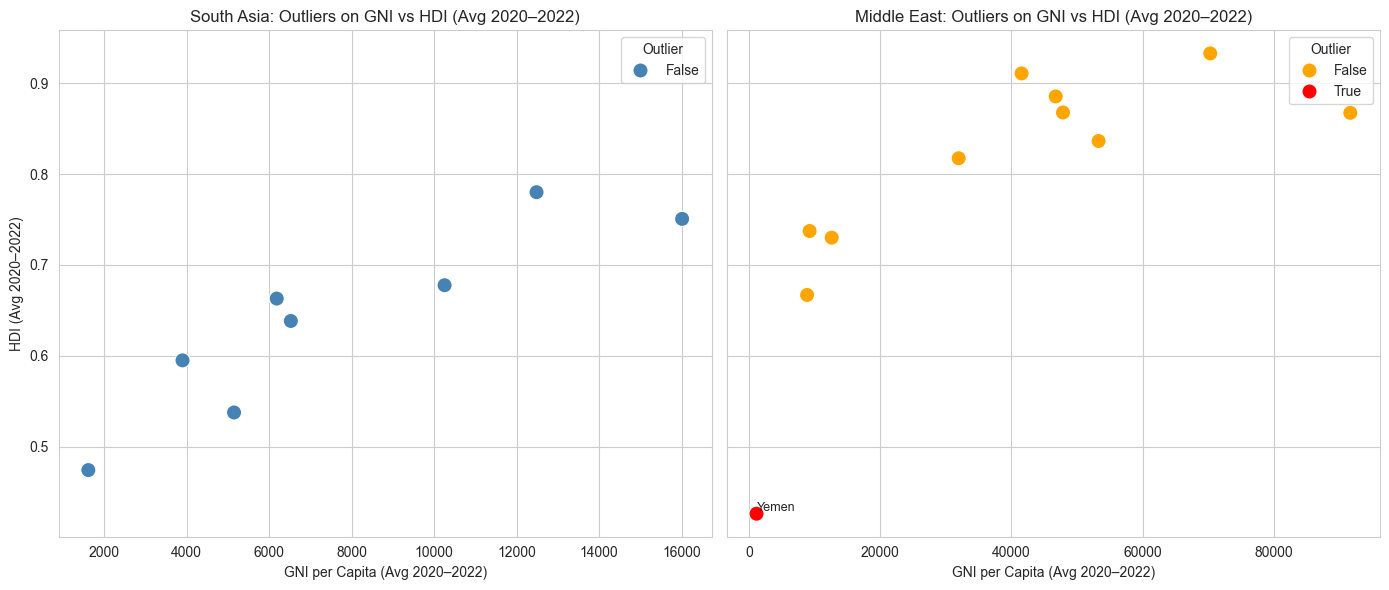

In [218]:

# 1) Aggregate to country averages (2020–2022)
sa_mean = south_asia_subset.groupby("country", as_index=False)[["hdi", "gross_inc_percap"]].mean()
me_mean = middle_east_subset.groupby("country", as_index=False)[["hdi", "gross_inc_percap"]].mean()

# Ensure numeric
for df_ in [sa_mean, me_mean]:
    df_["hdi"] = pd.to_numeric(df_["hdi"], errors="coerce")
    df_["gross_inc_percap"] = pd.to_numeric(df_["gross_inc_percap"], errors="coerce")

# 2) IQR bounds + flag function
def iqr_bounds(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return q1 - 1.5 * iqr, q3 + 1.5 * iqr

def add_outlier_flags(df_, col):
    lo, hi = iqr_bounds(df_[col].dropna())
    flag = (df_[col] < lo) | (df_[col] > hi)
    return flag, lo, hi

# 3) Flag outliers per region for HDI and GNI
sa_hdi_flag, sa_hdi_lo, sa_hdi_hi = add_outlier_flags(sa_mean, "hdi")
sa_gni_flag, sa_gni_lo, sa_gni_hi = add_outlier_flags(sa_mean, "gross_inc_percap")
sa_mean["outlier"] = sa_hdi_flag | sa_gni_flag

me_hdi_flag, me_hdi_lo, me_hdi_hi = add_outlier_flags(me_mean, "hdi")
me_gni_flag, me_gni_lo, me_gni_hi = add_outlier_flags(me_mean, "gross_inc_percap")
me_mean["outlier"] = me_hdi_flag | me_gni_flag

# 4) Print results (countries + bounds)
print("=== South Asia Outliers (Avg 2020–2022) ===")
print("HDI bounds:", (round(sa_hdi_lo, 4), round(sa_hdi_hi, 4)))
print("GNI bounds:", (round(sa_gni_lo, 2), round(sa_gni_hi, 2)))
print("Outlier countries:", sa_mean.loc[sa_mean["outlier"], "country"].tolist())
print()

print("=== Middle East Outliers (Avg 2020–2022) ===")
print("HDI bounds:", (round(me_hdi_lo, 4), round(me_hdi_hi, 4)))
print("GNI bounds:", (round(me_gni_lo, 2), round(me_gni_hi, 2)))
print("Outlier countries:", me_mean.loc[me_mean["outlier"], "country"].tolist())

# 5) Scatter plot: GNI vs HDI highlighting outliers (per region)
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.scatterplot(
    data=sa_mean, x="gross_inc_percap", y="hdi",
    hue="outlier", palette={False: "steelblue", True: "red"},
    s=120, ax=axes[0]
)
axes[0].set_title("South Asia: Outliers on GNI vs HDI (Avg 2020–2022)")
axes[0].set_xlabel("GNI per Capita (Avg 2020–2022)")
axes[0].set_ylabel("HDI (Avg 2020–2022)")

# annotate outliers
for _, r in sa_mean[sa_mean["outlier"]].iterrows():
    axes[0].text(r["gross_inc_percap"], r["hdi"], r["country"], fontsize=9, ha="left", va="bottom")

sns.scatterplot(
    data=me_mean, x="gross_inc_percap", y="hdi",
    hue="outlier", palette={False: "orange", True: "red"},
    s=120, ax=axes[1]
)
axes[1].set_title("Middle East: Outliers on GNI vs HDI (Avg 2020–2022)")
axes[1].set_xlabel("GNI per Capita (Avg 2020–2022)")
axes[1].set_ylabel("")

for _, r in me_mean[me_mean["outlier"]].iterrows():
    axes[1].text(r["gross_inc_percap"], r["hdi"], r["country"], fontsize=9, ha="left", va="bottom")

# clean legends (avoid duplicate)
axes[0].legend(title="Outlier", loc="best")
axes[1].legend(title="Outlier", loc="best")

plt.tight_layout()
plt.show()


NameError: name 'south_asia_mean' is not defined

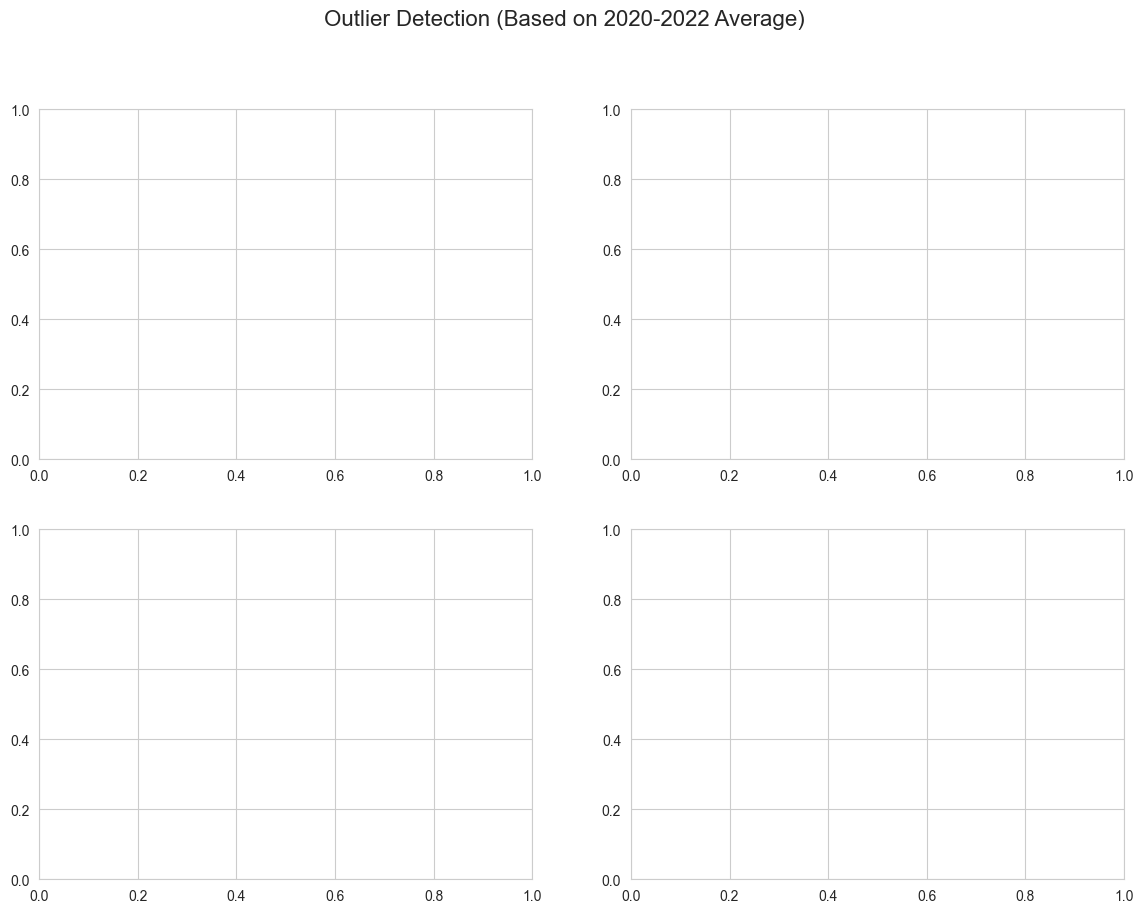

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Outlier Detection (Based on 2020-2022 Average)', fontsize=16)

# --- Helper function to plot ---
def plot_region_outliers(df, outliers, col, region_name, ax, color):
    # Plot all points
    sns.scatterplot(data=df, x='country', y=col, ax=ax, color=color, s=100, label='Normal')
    
    # Plot outliers on top in Red
    if not outliers.empty:
        sns.scatterplot(data=outliers, x='country', y=col, ax=ax, color='red', s=150, zorder=5, label='Outlier')
        
        # Annotate the outlier country names
        for i in range(outliers.shape[0]):
            ax.text(outliers.iloc[i]['country'], outliers.iloc[i][col], 
                    outliers.iloc[i]['country'], color='black', fontweight='bold', ha='right')

    ax.set_title(f'{region_name}: {col} Outliers')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')
    ax.legend()

# --- Plotting ---

# 1. South Asia - HDI
plot_region_outliers(south_asia_mean, sa_hdi_outliers, 'hdi', 'South Asia', axes[0,0], 'teal')

# 2. South Asia - GNI
plot_region_outliers(south_asia_mean, sa_gni_outliers, 'gross_inc_percap', 'South Asia', axes[0,1], 'teal')

# 3. Middle East - HDI
plot_region_outliers(middle_east_mean, me_hdi_outliers, 'hdi', 'Middle East', axes[1,0], 'orange')

# 4. Middle East - GNI
plot_region_outliers(middle_east_mean, me_gni_outliers, 'gross_inc_percap', 'Middle East', axes[1,1], 'orange')

plt.tight_layout()
plt.show()

###
# --- Outlier Discussion ---

print("OUTLIER ANALYSIS & DISCUSSION")

print("\n1. Middle East - HDI Outlier (Yemen):")
print("\n")
print("The detection algorithm identified Yemen as a significant statistical outlier")
print("for HDI in the Middle East region. This is analytically significant because:")
print("  • Regional Contrast: The Middle East region in this dataset is dominated")
print("    by High and Very High HDI nations (e.g., UAE, Israel, Saudi Arabia).")
print("  • The Cause: Yemen's HDI (~0.43) is drastically lower than the regional")
print("    cluster (~0.75 - 0.90), likely due to long-term conflict, political")
print("    instability, and humanitarian crises.")
print("  • Conclusion: Yemen represents a deviation from the regional development")
print("    pattern, highlighting extreme inequality within the region.")

print("\n2. South Asia - Lack of Outliers:")
print("\n")
print("Interestingly, no statistical outliers were detected for South Asia in")
print("either HDI or GNI per Capita, despite the massive gap between the")
print("Maldives (High) and Afghanistan (Low).")
print("  • Interpretation: This does not imply equality. Instead, it indicates")
print("    High Variance. The spread of data (Interquartile Range) is so wide")
print("    that the statistical boundaries for 'normalcy' encompass both extremes.")
print("  • Conclusion: In South Asia, high inequality is a systemic feature of")
print("    the region's distribution rather than an anomaly caused by one or two")
print("    outlier nations.")

